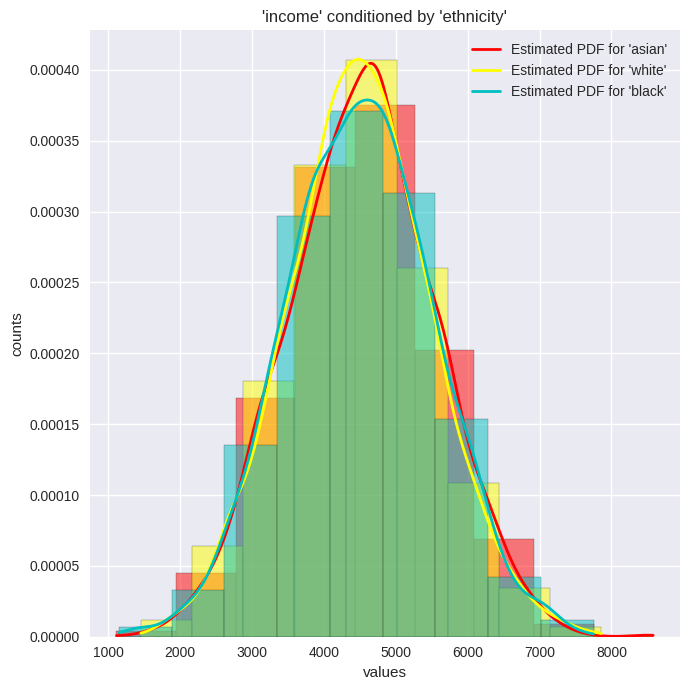

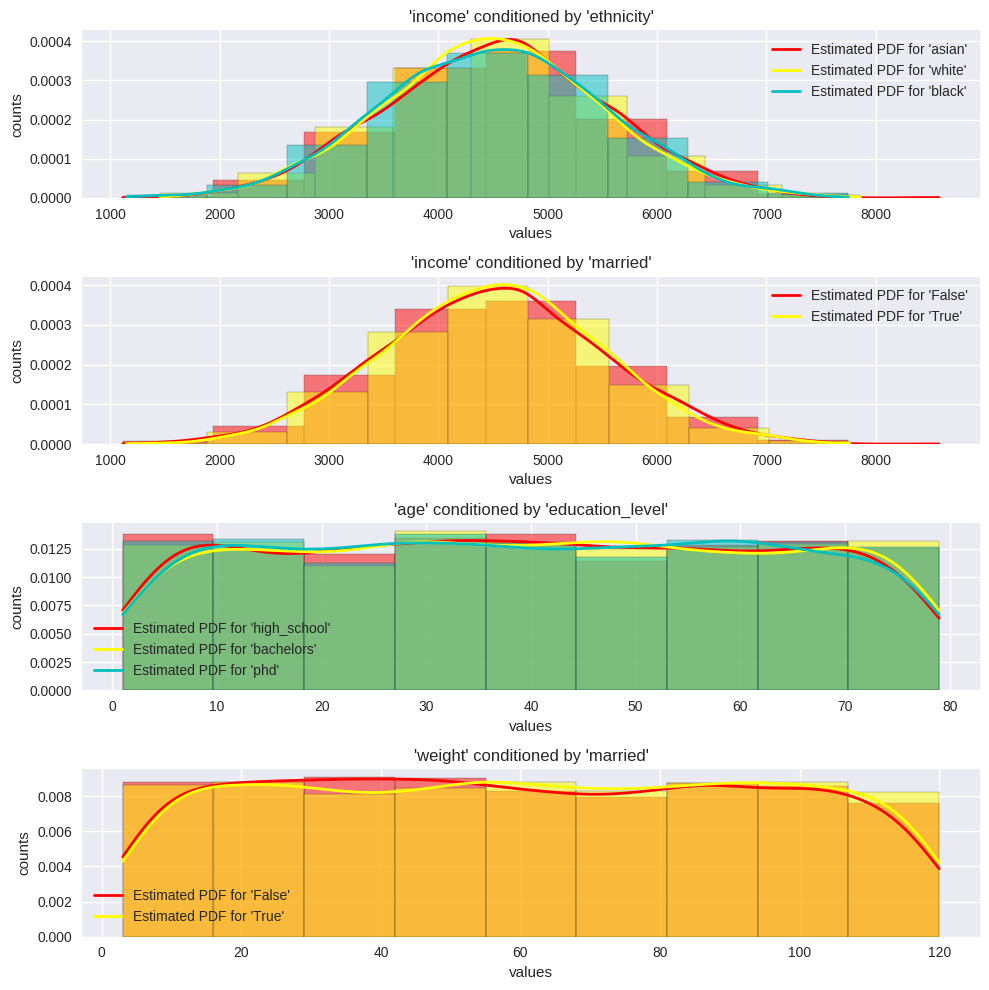

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

import copy

from typing import *

np.random.seed(0)

from matplotlib import pyplot as plt
plt.rcdefaults()
plt.style.use("seaborn")


class ConditionedHistogram:

  def __init__(self, 
               df: pd.DataFrame):
    
    self.__df = copy.deepcopy(df)

    # conditionining by more than 3 groups is not recommended cuz u can t see anything
    self.__colors = ["red", "yellow", "c"]
  

  """
  The first element of a tuple:
  -> is always the column you want to plot
  -> must always be a NUMERICAL column

  The second element of a tuple:
  -> is always the column that partitions the data
  -> must always be a BOOLEAN or CATEGORICAL column
  """
  def draw(self, 
           pairs: List[Tuple[str, str]],
           num_rows: int = 1,
           num_cols: int = 1,
           fig_size: Tuple[float, float] = (7, 7)):

    if len(pairs) == 1:

      self.draw_single_histogram(pair=pairs[0], fig_size=fig_size)

    else:

      if num_rows * num_cols != len(pairs):
        raise ValueError(f"""Please provide valid 'num_rows' and 'num_cols'... num_rows * num_cols != {len(pairs)}""")

      self.draw_multiple_histograms(pairs=pairs, num_rows=num_rows, 
                                    num_cols=num_cols, fig_size=fig_size)


  def draw_single_histogram(self, 
                            pair: Tuple[str, str], 
                            fig_size: Tuple[float, float]):

    increment_color = 0

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=fig_size)

    col_to_plot = pair[0]
    conditioning_col = pair[1]

    groups = self.__df.loc[:, conditioning_col].unique()

    for group in groups:
      
      filter_condition = self.__df.loc[:, conditioning_col] == group
      data = self.__df.loc[filter_condition, col_to_plot]

      ax.hist(x=data, 
              bins=1 + int(np.log(len(data))), 
              density=True, 
              edgecolor="black", 
              color=self.__colors[increment_color], 
              alpha=0.5)
      
      kde = stats.gaussian_kde(data.tolist())

      x_to_fit = np.linspace(start=data.min(), stop=data.max(), num=1000)
      fitted = kde(x_to_fit)

      ax.plot(x_to_fit, fitted, color=self.__colors[increment_color], 
              linewidth=2, label=f"""Estimated PDF for '{group}'""")

      increment_color += 1

    ax.set_title(f"""'{col_to_plot}' conditioned by '{conditioning_col}'""")
    ax.set_xlabel(xlabel=f"""values""")
    ax.set_ylabel(ylabel=f"""counts""")

    ax.legend(loc="best")

    plt.tight_layout()
    plt.show()


  def draw_multiple_histograms(self, 
                               pairs: List[Tuple[str, str]], 
                               num_rows: int,
                               num_cols: int,
                               fig_size: Tuple[float, float]):

    fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=fig_size)

    pairs = np.array(pairs).reshape((num_rows, num_cols, 2)) #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

    for i in range(0, len(pairs)):
      for j in range(0, len(pairs[i])):
        
        col_to_plot = pairs[i][j][0]
        conditioning_col = pairs[i][j][1]

        groups = self.__df.loc[:, conditioning_col].unique()

        increment_color = 0

        for group in groups:
          
          filter_condition = self.__df.loc[:, conditioning_col] == group
          data = self.__df.loc[filter_condition, col_to_plot]
          
          kde = stats.gaussian_kde(data.tolist())

          x_to_fit = np.linspace(start=data.min(), stop=data.max(), num=1000)
          fitted = kde(x_to_fit)

          if num_rows == 1 or num_cols == 1:

            indx = j if num_rows == 1 else i

            ax[indx].hist(x=data, bins=1 + int(np.log(len(data))), density=True,
                          edgecolor="black", color=self.__colors[increment_color],
                          alpha=0.5)
            
            ax[indx].plot(x_to_fit, fitted, linewidth=2, 
                          color=self.__colors[increment_color], 
                          label=f"""Estimated PDF for '{group}'""")
            
          else:

            ax[i][j].hist(x=data, bins=1 + int(np.log(len(data))), density=True,
                          edgecolor="black", color=self.__colors[increment_color],
                          alpha=0.5)
            
            ax[i][j].plot(x_to_fit, fitted, linewidth=2, 
                          color=self.__colors[increment_color], 
                          label=f"""Estimated PDF for '{group}'""")
          
          increment_color += 1
        
        if num_rows == 1 or num_cols == 1:

          indx = j if num_rows == 1 else i
          
          ax[indx].set_title(f"""'{col_to_plot}' conditioned by '{conditioning_col}'""")

          ax[indx].set_xlabel(xlabel=f"""values""")
          ax[indx].set_ylabel(ylabel=f"""counts""")

          ax[indx].legend(loc="best")

        else:

          ax[i][j].set_title(f"""'{col_to_plot}' conditioned by '{conditioning_col}'""")
          ax[i][j].set_xlabel(xlabel=f"""values""")
          ax[i][j].set_ylabel(ylabel=f"""counts""")

          ax[i][j].legend(loc="best")

    plt.tight_layout()
    plt.show()


  @staticmethod
  def return_copies(*args) -> list:
    return [copy.deepcopy(arg) for arg in args]



if __name__ == "__main__":

  np.random.seed(0)

  df = pd.DataFrame(data={"age": np.random.randint(low=1, high=80, size=10000),
                          "weight": np.random.uniform(low=3, high=120, size=10000),
                          "income": np.random.normal(loc=4500, scale=1000, size=10000),
                          "married": np.random.choice(a=[True, False], size=10000, replace=True),
                          "ethnicity": pd.Categorical(values=np.random.choice(a=("white", "black", "asian"), size=10000, replace=True), categories=("white", "black", "asian"), ordered=False),
                          "education_level": pd.Categorical(values=np.random.choice(a=("high_school", "bachelors", "phd"), size=10000, replace=True), categories=("high_school", "bachelors", "phd"), ordered=True)
                          })

  df_dtypes = dict()

  df_dtypes["numerical_discrete_columns"] = ["age"]
  df_dtypes["numerical_continous_columns"] = ["weight", "income"]

  for col in df_dtypes["numerical_discrete_columns"]:
    df.loc[:, col] = df.loc[:, col].astype(pd.Int64Dtype())

  for col in df_dtypes["numerical_continous_columns"]:
    df.loc[:, col] = df.loc[:, col].astype(pd.Float64Dtype())

  for col in df.dtypes.loc[df.dtypes.isin(values=["bool"])].index:
    df.loc[:, col] = df.loc[:, col].astype(pd.BooleanDtype())


  pairs = [("income", "ethnicity"), ("income", "married"), 
           ("age", "education_level"), ("weight", "married")]

  conditioned_histograms_obj = ConditionedHistogram(df)

  conditioned_histograms_obj.draw(pairs=[("income", "ethnicity")])

  conditioned_histograms_obj.draw(pairs=pairs, num_rows=4, num_cols=1, fig_size=(10, 10))

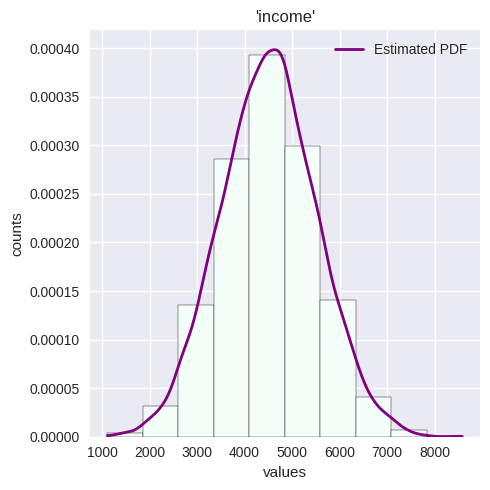

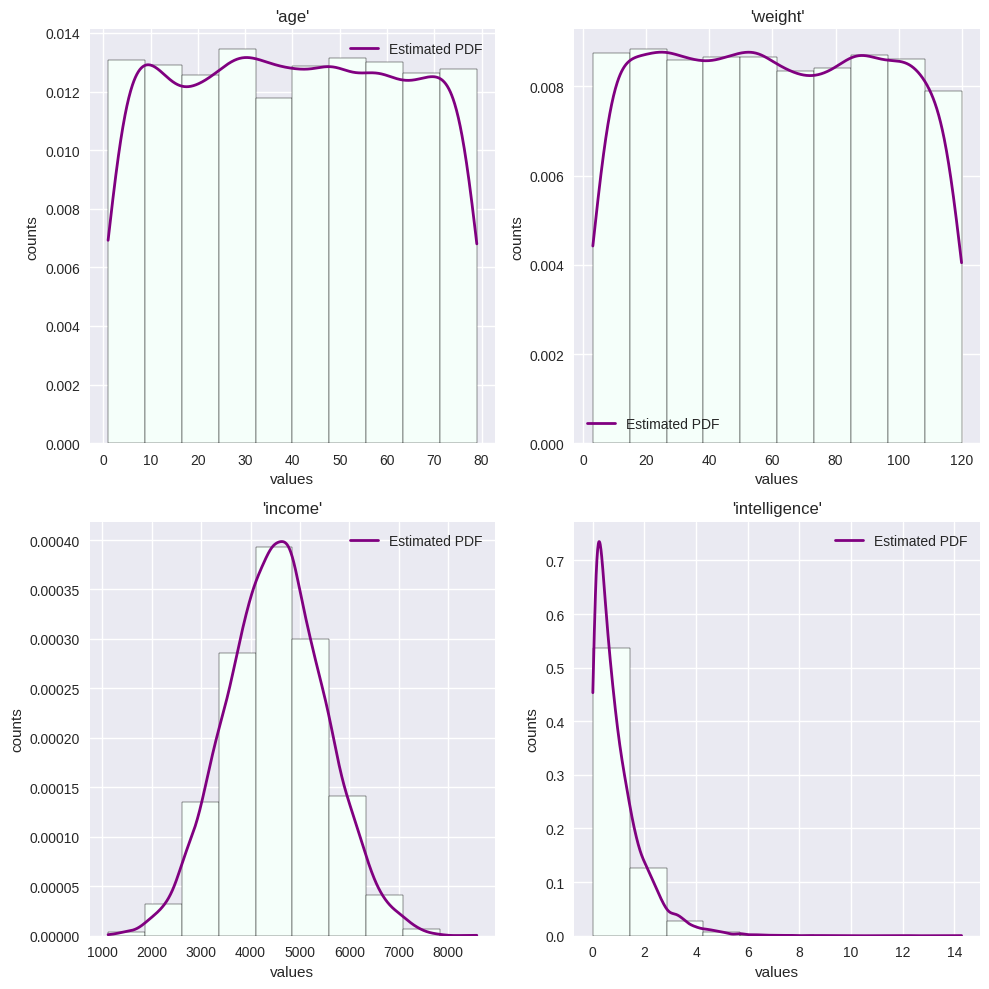

In [ ]:
from typing import *
from typing_extensions import *

import numpy as np
import pandas as pd

from scipy import stats

from matplotlib import pyplot as plt
plt.rcdefaults()
plt.style.use("seaborn")


import copy

class SimpleHistogram:

  def __init__(self, 
               df: pd.DataFrame,
               numerical_columns: Union[List[str], None] = None):

    copies = SimpleHistogram.return_copies(df, numerical_columns)
    self.__df, self.__numerical_columns = copies
    
    if self.__numerical_columns is None:
      
      accepted_dtypes = [pd.Int32Dtype(), pd.Int64Dtype(), 
                         pd.Float32Dtype(), pd.Float64Dtype(), 
                         "int32", "int64", "float32", "float64"]

      condition = self.__df.dtypes.isin(values=accepted_dtypes)
      
      self.__numerical_columns = self.__df.dtypes.loc[condition].index.tolist()
  

  @property
  def get_df(self) -> pd.DataFrame:
    return self.__df
  

  @property
  def get_numerical_columns(self) -> Union[List[str], None]:
    return self.__numerical_columns


  @staticmethod
  def return_copies(*args) -> list:
    return [copy.deepcopy(elem) for elem in args]
  

  def draw(self,
          num_rows: int = 1,
          num_cols: int = 1,
          fig_size: Tuple[float, float] = (5, 5)) -> None:

    if len(self.__numerical_columns) == 1:

      self.simple_histogram(fig_size=fig_size)

    else:

      raise_error_condition = (num_rows * num_cols) != len(self.__numerical_columns)

      if raise_error_condition:
        raise ValueError(f"""Please provide valid 'num_rows' and 'num_cols'... """\
                         f"""num_rows * num_cols != {len(self.__numerical_columns)}""")
        
      self.multiple_simple_histograms(num_rows=num_rows, 
                                      num_cols=num_cols, 
                                      fig_size=fig_size)


  def simple_histogram(self,
                       fig_size: Tuple[float, float]) -> None:
      
      fig, ax = plt.subplots(nrows=1, ncols=1, figsize=fig_size)

      data = self.__df.loc[:, self.__numerical_columns[0]]

      # -> The 'density' parameter, which normalizes bin heights so that the integral of the histogram is 1. 
      # -> The resulting histogram is an approximation of the probability density function.
      ax.hist(x=data, 
              bins=1 + int(np.log(len(data))),
              color="mintcream",
              edgecolor="black", 
              density=True)
      
      kde = stats.gaussian_kde(data.tolist())

      x_to_fit = np.linspace(start=data.min(), stop=data.max(), num=1000)
      fitted = kde(x_to_fit)

      ax.plot(x_to_fit, fitted, color="purple", linewidth=2, label="Estimated PDF")

      ax.set_title(f"""'{self.__numerical_columns[0]}'""")
      ax.set_xlabel(xlabel="values")
      ax.set_ylabel(ylabel="counts")

      ax.legend()

      plt.tight_layout()
      plt.show()


  def multiple_simple_histograms(self,
                                 num_rows: int,
                                 num_cols: int,
                                 fig_size: Tuple[float, float]):

      fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=fig_size)

      numerical_columns = np.array(self.__numerical_columns).reshape((num_rows, num_cols))

      for i in range(0, len(numerical_columns)):
        for j in range(0, len(numerical_columns[i])):

          data = self.__df.loc[:, numerical_columns[i][j]]
          
          kde = stats.gaussian_kde(data.tolist())

          x_to_fit = np.linspace(start=data.min(), stop=data.max(), num=1000)
          fitted = kde(x_to_fit)


          if num_cols == 1 or num_rows == 1:

            indx = i if num_cols == 1 else j

            ax[indx].hist(x=data, 
                          bins=1 + int(np.log(len(data))), 
                          color="mintcream", 
                          edgecolor="black",
                          density=True)  
                      
            ax[indx].plot(x_to_fit, fitted, linewidth=2, color="purple", 
                       label="Estimated PDF")
            
            ax[indx].set_title(f"""'{numerical_columns[i][j]}'""")
            ax[indx].set_xlabel(xlabel="values")
            ax[indx].set_ylabel(ylabel="counts")

            ax[indx].legend()
          
          else:

            ax[i][j].hist(x=data, 
                          bins=1 + int(np.log(len(data))), 
                          color="mintcream", 
                          edgecolor="black",
                          density=True)
                      
            ax[i][j].plot(x_to_fit, fitted, linewidth=2, color="purple", 
                          label="Estimated PDF")
            
            ax[i][j].set_title(f"""'{numerical_columns[i][j]}'""")
            ax[i][j].set_xlabel(xlabel="values")
            ax[i][j].set_ylabel(ylabel="counts")

            ax[i][j].legend()

      plt.tight_layout()
      plt.show()


if __name__ == "__main__":

  np.random.seed(0)

  df = pd.DataFrame(data={"age": np.random.randint(low=1, high=80, size=10000),
                          "weight": np.random.uniform(low=3, high=120, size=10000),
                          "income": np.random.normal(loc=4500, scale=1000, size=10000),
                          "intelligence": np.random.exponential(scale=1, size=10000),
                          "married": np.random.choice(a=[True, False], size=10000, replace=True),
                          "ethnicity": pd.Categorical(values=np.random.choice(a=("white", "black", "asian"), size=10000, replace=True), 
                                                      categories=("white", "black", "asian"), 
                                                      ordered=False),
                          "education_level": pd.Categorical(values=np.random.choice(a=("high_school", "bachelors", "phd"), size=10000, replace=True), 
                                                            categories=("high_school", "bachelors", "phd"), 
                                                            ordered=True)
                          })

  df_dtypes = dict()

  df_dtypes["numerical_discrete_columns"] = ["age"]
  df_dtypes["numerical_continous_columns"] = ["weight", "income", "intelligence"]

  for col in df_dtypes["numerical_discrete_columns"]:
    df.loc[:, col] = df.loc[:, col].astype(pd.Int64Dtype())

  for col in df_dtypes["numerical_continous_columns"]:
    df.loc[:, col] = df.loc[:, col].astype(pd.Float64Dtype())

  for col in df.dtypes.loc[df.dtypes.isin(values=["bool"])].index:
    df.loc[:, col] = df.loc[:, col].astype(pd.BooleanDtype())

  SimpleHistogram(df.loc[:, ["income"]]).draw()

  SimpleHistogram(df).draw(num_rows=2, num_cols=2, fig_size=(10, 10))

In [ ]:
import numpy as np
import pandas as pd

from typing import *

from sklearn import datasets
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, learning_curve, BaseCrossValidator, KFold
from sklearn.svm import SVC

from scipy import stats

from matplotlib import pyplot as plt
plt.rcdefaults()
plt.style.use("seaborn")

import sklearn

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.width", None)

%%time
X, y = datasets.load_breast_cancer(return_X_y=True, as_frame=True)

svm_hyper_params = RandomizedSearchCV(estimator=SVC(kernel="linear",
                                                    probability=True,
                                                    random_state=0),
                                      param_distributions={"C": stats.expon(scale=0.1)},
                                      n_iter=100, 
                                      n_jobs=-1, 
                                      cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=0),
                                      return_train_score=True)

results = pd.DataFrame(svm_hyper_params.fit(X, y).cv_results_).sort_values(by=["param_C"])

CPU times: user 13.6 s, sys: 662 ms, total: 14.2 s
Wall time: 15min 1s


In [ ]:
results.head(5)

CPU times: user 189 µs, sys: 0 ns, total: 189 µs
Wall time: 198 µs


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
4,0.548221,0.169974,0.004108,0.002171,0.028243,{'C': 0.028242883755717624},0.938596,0.973684,0.929825,0.929825,0.964602,0.912281,0.973684,0.938596,0.95614,0.929204,0.944644,0.020038,5,0.960440,0.951648,0.962637,0.956044,0.949561,0.956044,0.951648,0.962637,0.949451,0.967105,0.956722,0.005901
8,0.634642,0.183385,0.003830,0.001267,0.033691,{'C': 0.03369141337614761},0.938596,0.973684,0.929825,0.929825,0.964602,0.912281,0.973684,0.938596,0.95614,0.929204,0.944644,0.020038,5,0.964835,0.949451,0.962637,0.956044,0.953947,0.956044,0.951648,0.962637,0.949451,0.967105,0.957380,0.006160
3,0.613049,0.181597,0.003295,0.000152,0.034939,{'C': 0.03493903134956147},0.938596,0.973684,0.929825,0.929825,0.955752,0.912281,0.973684,0.938596,0.95614,0.929204,0.943759,0.019320,9,0.964835,0.949451,0.962637,0.956044,0.953947,0.958242,0.951648,0.960440,0.951648,0.967105,0.957600,0.005741
6,0.756826,0.188237,0.003424,0.000332,0.044069,{'C': 0.04406928055633866},0.938596,0.973684,0.929825,0.929825,0.955752,0.921053,0.973684,0.938596,0.95614,0.929204,0.944636,0.018027,8,0.964835,0.953846,0.962637,0.958242,0.953947,0.956044,0.951648,0.964835,0.951648,0.967105,0.958479,0.005602
5,1.009079,0.221538,0.003350,0.000183,0.051181,{'C': 0.0511808914571181},0.938596,0.973684,0.929825,0.921053,0.955752,0.912281,0.973684,0.938596,0.95614,0.929204,0.942882,0.020115,10,0.962637,0.956044,0.962637,0.958242,0.953947,0.958242,0.951648,0.964835,0.951648,0.967105,0.958699,0.005185


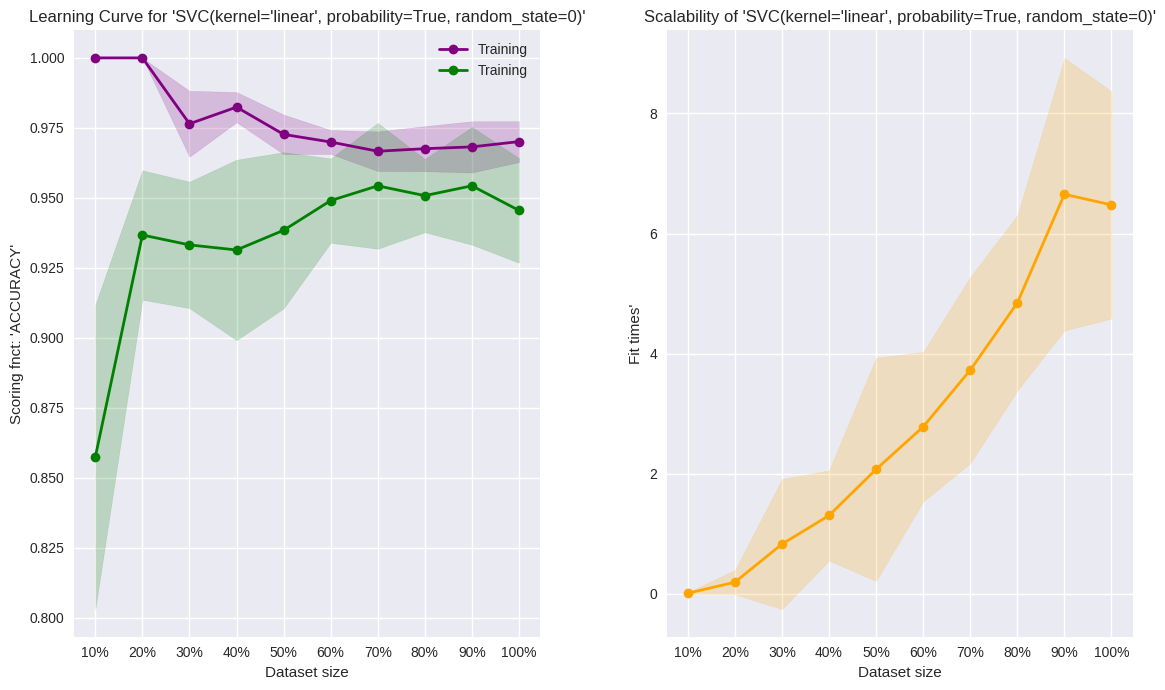

CPU times: user 2min 24s, sys: 236 ms, total: 2min 25s
Wall time: 2min 25s


In [ ]:
%%time
def learning_curve_plot(my_estimator: sklearn.base.BaseEstimator,
                        dataset_X: List[List[float]],
                        dataset_y: Union[List[int], List[float]],
                        cv_strategy: BaseCrossValidator,
                        scoring_fnct: str,
                        train_sizes: List[float] = np.linspace(start=0.1, stop=1.0, num=10)) -> None:
  
  _, train_scores, test_scores, fit_times, score_times = learning_curve(estimator=my_estimator,
                                                                        X=dataset_X,
                                                                        y=dataset_y,
                                                                        train_sizes=train_sizes,
                                                                        cv=cv_strategy,
                                                                        scoring=scoring_fnct,
                                                                        shuffle=False,
                                                                        return_times=True)

  mean_train_scores = np.mean(train_scores, axis=1)
  std_train_scores = np.std(train_scores, axis=1)
  mean_validation_scores = np.mean(test_scores, axis=1)
  std_validation_scores = np.std(test_scores, axis=1)

  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))

  x_label = np.array([str(int(elem * 100)) + "%" for elem in train_sizes])

  ax[0].plot(x_label, mean_train_scores, marker="o",
             linestyle="-", linewidth="2", color="purple", label="Training")
  
  ax[0].fill_between(x_label,
                     mean_train_scores - std_train_scores,
                     mean_train_scores + std_train_scores,
                     color="purple",
                     alpha=0.2)
  
  ax[0].plot(x_label, mean_validation_scores, marker="o",
             linestyle="-", linewidth="2", color="green", label="Training")
  
  ax[0].fill_between(x_label,
                     mean_validation_scores - std_validation_scores,
                     mean_validation_scores + std_validation_scores,
                     color="green",
                     alpha=0.2)
  
  ax[0].set_title(f"""Learning Curve for '{my_estimator.__repr__()}'""")

  ax[0].set_xlabel(xlabel=f"""Dataset size""")
  ax[0].set_ylabel(ylabel=f"""Scoring fnct: '{scoring_fnct.upper()}'""")

  ax[0].legend()

  #-----------------------------------------------------------------------------

  mean_fit_times = np.mean(fit_times, axis=1)
  std_fit_times = np.std(fit_times, axis=1)

  ax[1].plot(x_label, mean_fit_times, 
             marker="o", linestyle="-", linewidth=2, color="orange")
  
  ax[1].fill_between(x_label,
                     mean_fit_times - std_fit_times,
                     mean_fit_times + std_fit_times,
                     color="orange",
                     alpha=0.2)
  
  ax[1].set_title(f"""Scalability of '{my_estimator.__repr__()}'""")
  ax[1].set_xlabel(xlabel=f"""Dataset size""")
  ax[1].set_ylabel(ylabel=f"""Fit times'""")

  plt.tight_layout()
  plt.show()


est = SVC(kernel="linear", probability=True, random_state=0)

learning_curve_plot(my_estimator=est,
                    dataset_X=X,
                    dataset_y=y,
                    cv_strategy=StratifiedKFold(n_splits=5),
                    scoring_fnct="accuracy")

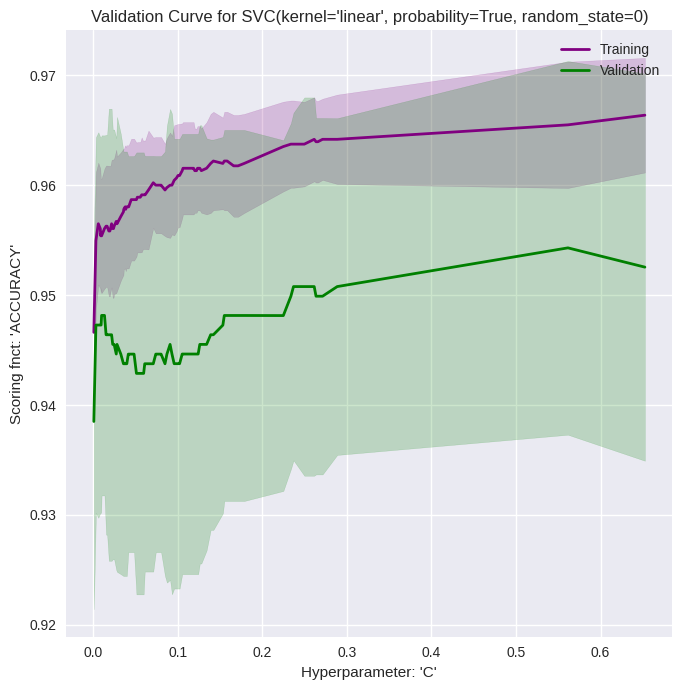

In [ ]:
%%time
def validation_curve_plot(my_estimator: sklearn.base.BaseEstimator, 
                          hyper_param_to_observe: str,
                          hyper_param_values: List[float], # MUST BE SORTED IN INCREASING ORDER
                          scoring_fnct: str,
                          mean_train_scores: List[float],  # EACH SCORE CORRESPONDING TO THE RIGHT HYPER PARAMETER VALUE
                          std_train_scores: List[float],
                          mean_test_scores: List[float],
                          std_test_scores: List[float]) -> None:
  
  scoring_fnct = scoring_fnct.upper()

  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

  ax.plot(hyper_param_values, mean_train_scores, 
          linestyle="-", linewidth=2, color="purple", label="Training")

  ax.fill_between(hyper_param_values, 
                  mean_train_scores - std_train_scores,
                  mean_train_scores + std_train_scores,
                  color="purple",
                  alpha=0.2)
  
  ax.plot(hyper_param_values, mean_test_scores,
          linestyle="-", linewidth=2, color="green", label="Validation")
  
  ax.fill_between(hyper_param_values,
                  mean_test_scores - std_test_scores,
                  mean_test_scores + std_test_scores,
                  color="green",
                  alpha=0.2)
  
  ax.set_title(f"Validation Curve for {my_estimator.__repr__()}")
  ax.set_xlabel(xlabel=f"""Hyperparameter: '{hyper_param_to_observe}'""")
  ax.set_ylabel(ylabel=f"""Scoring fnct: '{scoring_fnct}'""")

  ax.legend(loc="best")

  plt.tight_layout()
  plt.show()



est = SVC(kernel="linear", probability=True, random_state=0)

C_values = results.loc[:, "param_C"].astype(float).to_numpy()

mean_train_scores = results.loc[:, "mean_train_score"].to_numpy()
std_train_scores = results.loc[:, "std_train_score"].to_numpy()

mean_test_scores = results.loc[:, "mean_test_score"].to_numpy()
std_test_scores = results.loc[:, "std_test_score"].to_numpy()

validation_curve_plot(my_estimator=est, 
                      hyper_param_to_observe="C", 
                      hyper_param_values=C_values, 
                      scoring_fnct="accuracy", 
                      mean_train_scores=mean_train_scores, 
                      std_train_scores=std_train_scores, 
                      mean_test_scores=mean_test_scores, 
                      std_test_scores=std_test_scores)

In [ ]:
grid = pd.DataFrame(data={"%": (100, 40, 60, 30, 70, 10, 30, 20, 40),
                          "Type_1_A": ("", "X1 Y1 0", "X2 Y1 0", "", "", "", "", "", ""),
                          "Type_1_B": ("", "", "", "0 Y1 Z1", "0 Y1 Z2", "", "", "", ""),
                          "Type_2": ("", "", "", "", "", "X1 Y1 Z1", "X1 Y1 Z2", "X2 Y1 Z1", "X2 Y1 Z2"),
                          "Mean": (1000, 400, 600, 300, 700, 100, 300, 200, 400),
                          "Threshold": (200, 80, 120, 60, 140, 20, 60, 40, 80),
                          "Actual": (100, 100, 0, 50, 50, 50, 50, 0, 0)})
grid

,%,Type_1_A,Type_1_B,Type_2,Mean,Threshold,Actual
0,100,,,,1000,200,100
1,40,X1 Y1 0,,,400,80,100
2,60,X2 Y1 0,,,600,120,0
3,30,,0 Y1 Z1,,300,60,50
4,70,,0 Y1 Z2,,700,140,50
5,10,,,X1 Y1 Z1,100,20,50
6,30,,,X1 Y1 Z2,300,60,50
7,20,,,X2 Y1 Z1,200,40,0
8,40,,,X2 Y1 Z2,400,80,0


In [ ]:
grid["Alerts"] = (grid["Actual"] < grid["Threshold"]).astype(int).tolist()
print((grid["Actual"] < grid["Threshold"]).astype(int).tolist())
grid

[1, 0, 1, 1, 1, 0, 1, 1, 1]


,%,Type_1_A,Type_1_B,Type_2,Mean,Threshold,Actual,Alerts
0,100,,,,1000,200,100,1
1,40,X1 Y1 0,,,400,80,100,0
2,60,X2 Y1 0,,,600,120,0,1
3,30,,0 Y1 Z1,,300,60,50,1
4,70,,0 Y1 Z2,,700,140,50,1
5,10,,,X1 Y1 Z1,100,20,50,0
6,30,,,X1 Y1 Z2,300,60,50,1
7,20,,,X2 Y1 Z1,200,40,0,1
8,40,,,X2 Y1 Z2,400,80,0,1


In [ ]:
grid["Influence"] = (grid["%"] * (grid["Mean"] - grid["Actual"])) / 100
grid.loc[0, "Influence"] = "-"
grid

,%,Type_1_A,Type_1_B,Type_2,Mean,Threshold,Actual,Alerts,Influence
0,100,,,,1000,200,100,1,-
1,40,X1 Y1 0,,,400,80,100,0,120.0
2,60,X2 Y1 0,,,600,120,0,1,360.0
3,30,,0 Y1 Z1,,300,60,50,1,75.0
4,70,,0 Y1 Z2,,700,140,50,1,455.0
5,10,,,X1 Y1 Z1,100,20,50,0,5.0
6,30,,,X1 Y1 Z2,300,60,50,1,75.0
7,20,,,X2 Y1 Z1,200,40,0,1,40.0
8,40,,,X2 Y1 Z2,400,80,0,1,160.0


In [ ]:
percentage_influence = []

for col_loc in range(1, grid.columns.get_loc("Mean")):
  reference_col = grid.columns[col_loc]
  reference_series = grid[[reference_col] + ["Influence"]]["Influence"][grid[reference_col] != ""]
  percentage_influence.extend((reference_series / reference_series.sum()).tolist())

grid["%Influence"] = 0
grid.loc[1:, "%Influence"] = [round(elem, 2) for elem in percentage_influence]
grid.loc[0, "%Influence"] = "-"

grid

,%,Type_1_A,Type_1_B,Type_2,Mean,Threshold,Actual,Alerts,Influence,%Influence
0,100,,,,1000,200,100,1,-,-
1,40,X1 Y1 0,,,400,80,100,0,120.0,0.25
2,60,X2 Y1 0,,,600,120,0,1,360.0,0.75
3,30,,0 Y1 Z1,,300,60,50,1,75.0,0.14
4,70,,0 Y1 Z2,,700,140,50,1,455.0,0.86
5,10,,,X1 Y1 Z1,100,20,50,0,5.0,0.02
6,30,,,X1 Y1 Z2,300,60,50,1,75.0,0.27
7,20,,,X2 Y1 Z1,200,40,0,1,40.0,0.14
8,40,,,X2 Y1 Z2,400,80,0,1,160.0,0.57


In [ ]:
mean_col_index = grid.columns.get_loc("Mean")

parent_child_dict = {}

free_ones = []

for i in range(1, grid.shape[0]):
  for j in range(1, mean_col_index):
    cell = grid.iloc[i].iloc[j]
    if cell not in (None, np.nan, "") and "0" not in cell:
      free_ones.append(f"""{grid.iloc[i].loc["Mean"] - grid.iloc[i].loc["Actual"]} justified by {cell}""")
    else:
      if cell not in (None, np.nan, "") and "0" in cell:
        parent_child_dict[cell] = [f""" {grid.iloc[i].loc["Mean"] - grid.iloc[i].loc["Actual"]} justified by {cell}, out of which: """]
        parent_comb = re.split(" ", cell)
        children = []

        for k in range(i + 1, grid.shape[0]):
          for d in range(j + 1, mean_col_index):

            child_cell = grid.iloc[k].iloc[d]
            if child_cell not in (None, np.nan, "") and "0" not in child_cell:
              child_comb = re.split(" ", child_cell)
              if sum([parent_comb[_] != child_comb[_] for _ in range(0, len(child_comb))]) == 1:

                explanation = f"""{grid.iloc[k].loc["Mean"] - grid.iloc[k].loc["Actual"]} justified by {grid.iloc[k].iloc[d]}"""
                parent_child_dict[cell].append(explanation)

In [ ]:
parent_child_dict

{'0 Y1 Z1': [' 250 justified by 0 Y1 Z1, out of which: ',
  '50 justified by X1 Y1 Z1',
  '200 justified by X2 Y1 Z1'],
 '0 Y1 Z2': [' 650 justified by 0 Y1 Z2, out of which: ',
  '250 justified by X1 Y1 Z2',
  '400 justified by X2 Y1 Z2'],
 'X1 Y1 0': [' 300 justified by X1 Y1 0, out of which: ',
  '50 justified by X1 Y1 Z1',
  '250 justified by X1 Y1 Z2'],
 'X2 Y1 0': [' 600 justified by X2 Y1 0, out of which: ',
  '200 justified by X2 Y1 Z1',
  '400 justified by X2 Y1 Z2']}

In [ ]:
free_ones

['50 justified by X1 Y1 Z1',
 '250 justified by X1 Y1 Z2',
 '200 justified by X2 Y1 Z1',
 '400 justified by X2 Y1 Z2']

In [ ]:
class TestBayesianInferences(unittest.TestCase):

  def setUp(self):
    grid = pd.DataFrame(data={"%": (100, 40, 60, 30, 70, 10, 30, 20, 40),
                          "Type_1_A": ("", "X1 Y1 0", "X2 Y1 0", "", "", "", "", "", ""),
                          "Type_1_B": ("", "", "", "0 Y1 Z1", "0 Y1 Z2", "", "", "", ""),
                          "Type_2": ("", "", "", "", "", "X1 Y1 Z1", "X1 Y1 Z2", "X2 Y1 Z1", "X2 Y1 Z2"),
                          "Mean": (1000, 400, 600, 300, 700, 100, 300, 200, 400),
                          "Threshold": (200, 80, 120, 60, 140, 20, 60, 40, 80),
                          "Actual": (100, 100, 0, 50, 50, 50, 50, 0, 0)})

  def test_should_calculate_alert_flag_when_given_grid(self):
    result = (self.grid["Actual"] < self.grid["Threshold"]).astype(int).tolist()
    actual = [1, 0, 1, 1, 1, 0, 1, 1, 1]
    self.assertEqual(result, actual)

  def test_should_calculate_influence_when_given_grid(self):
    result = ((self.grid["%"] * (self.grid["Mean"] - self.grid["Actual"])) / 100).astype(int).tolist()
    actual = [120, 360, 75, 455, 5, 75, 40, 160]
    self.assertEqual(result, actual)
  
  def test_should_calculate_percentage_influence_when_given_grid(self):
    percentage_influence = []

    for col_loc in range(1, grid.columns.get_loc("Mean")):
      reference_col = self.grid.columns[col_loc]
      reference_series = self.grid[[reference_col] + ["Influence"]]["Influence"][self.grid[reference_col] != ""]
      percentage_influence.extend((reference_series / reference_series.sum()).tolist())

    result = [round(elem, 2) for elem in percentage_influence]

    actual = ['-', 0.25, 0.75, 0.14, 0.86, 0.02, 0.27, 0.14, 0.57]

    self.assertEqual(result, actual)

  def test_should_calculate_inferences_for_user(self):
    mean_col_index = self.grid.columns.get_loc("Mean")

    parent_child_dict = {}

    free_ones = []

    for i in range(1, self.grid.shape[0]):
      for j in range(1, mean_col_index):
        cell = self.grid.iloc[i].iloc[j]
        if cell not in (None, np.nan, "") and "0" not in cell:
          free_ones.append(f"""{self.grid.iloc[i].loc["Mean"] - self.grid.iloc[i].loc["Actual"]} justified by {cell}""")
        else:
          if cell not in (None, np.nan, "") and "0" in cell:
            parent_child_dict[cell] = [f""" {self.grid.iloc[i].loc["Mean"] - self.grid.iloc[i].loc["Actual"]} justified by {cell}, out of which: """]
            parent_comb = re.split(" ", cell)
            children = []

            for k in range(i + 1, self.grid.shape[0]):
              for d in range(j + 1, mean_col_index):

                child_cell = self.grid.iloc[k].iloc[d]
                if child_cell not in (None, np.nan, "") and "0" not in child_cell:
                  child_comb = re.split(" ", child_cell)
                  if sum([parent_comb[_] != child_comb[_] for _ in range(0, len(child_comb))]) == 1:

                    explanation = f"""{self.grid.iloc[k].loc["Mean"] - self.grid.iloc[k].loc["Actual"]} justified by {self.grid.iloc[k].iloc[d]}"""
                    parent_child_dict[cell].append(explanation)

    self.assertEqual({'0 Y1 Z1': [' 250 justified by 0 Y1 Z1, out of which: ',
                                  '50 justified by X1 Y1 Z1',
                                  '200 justified by X2 Y1 Z1'],
                      '0 Y1 Z2': [' 650 justified by 0 Y1 Z2, out of which: ',
                                  '250 justified by X1 Y1 Z2',
                                  '400 justified by X2 Y1 Z2'],
                      'X1 Y1 0': [' 300 justified by X1 Y1 0, out of which: ',
                                  '50 justified by X1 Y1 Z1',
                                  '250 justified by X1 Y1 Z2'],
                      'X2 Y1 0': [' 600 justified by X2 Y1 0, out of which: ',
                                  '200 justified by X2 Y1 Z1',
                                  '400 justified by X2 Y1 Z2']}, parent_child_dict)
    
    self.assertEqual(free_ones, ['50 justified by X1 Y1 Z1', 
                                 '250 justified by X1 Y1 Z2', 
                                 '200 justified by X2 Y1 Z1', 
                                 '400 justified by X2 Y1 Z2'])
  
  def test_if_first_column_has_0_on_last_position_only(self):
    not_empty_cells = self.grid["Type_1_A"][self.grid["Type_1_A"] != ""]
    results = [cell[-1] == '0' for cell in not_empty_cells]

    self.assertEqual(sum(results) == len(not_empty_cells))
  
  def test_if_second_column_has_0_on_first_position_only(self):
    not_empty_cells = self.grid["Type_1_B"][self.grid["Type_1_B"] != ""]
    results = [cell[2] == '0' for cell in not_empty_cells]

    self.assertEqual(sum(results) == len(not_empty_cells))
  
  def test_if_third_column_has_any_0(self):
    not_empty_cells = self.grid["Type_2"][self.grid["Type_2"] != ""]
    results = ["0" not in cell for cell in not_empty_cells]

    self.assertEqual(sum(results) == len(not_empty_cells))


In [ ]:
from scipy import stats

uniform_distr = stats.uniform(loc=5, scale=10)

generated_data = uniform_distr.rvs(size=10)

uniform_distr.pdf(8)
# from matplotlib import pyplot as plt
# plt.rcdefaults()
# plt.style.use("seaborn")

# fig, ax = plt.subplots(nrows=1, ncols=1)

# ax.hist(generated_data)

0.1

In [ ]:
import pandas as pd

categorical = pd.Categorical(values=["easy", "medium", "easy", "easy", "hard", "easy", "hard", "medium"],
                             categories=["easy", "medium", "hard"],
                             ordered=True)

s = pd.Series(data=categorical, dtype="category")

s.sort_values()

0      easy
2      easy
3      easy
5      easy
1    medium
7    medium
4      hard
6      hard
dtype: category
Categories (3, object): ['easy' < 'medium' < 'hard']

In [ ]:
pd.CategoricalDtype()

CategoricalDtype(categories=None, ordered=False)

In [ ]:
import pandas as pd
import unittest

class TestCategoricalData(unittest.TestCase):

  def setUp(self):

    int_data = [1, 3, 2, 1, 4, 1, 2, 2, 3, 3, 1, 2, 3, np.nan]

    int_series = pd.Series(data=int_data, 
                           dtype=pd.Int64Dtype(), 
                           index=range(len(int_data)), 
                           name="integer_series")
    
    float_data = [12.5, 10.5, 8.5, 12.5, 8.5, 10.5, np.nan, np.nan]

    float_series = pd.Series(data=float_data, 
                             dtype=pd.Float64Dtype(), 
                             index=range(len(float_data)), 
                             name="float_series")
    
    string_data = ["easy", "hard", "easy", "medium", "easy", "hard", "hard", "medium", np.nan, np.nan]

    string_series = pd.Series(data=string_data,
                              dtype=pd.StringDtype(),
                              index=range(len(string_data)),
                              name="string_series")
    


In [ ]:
from typing import *
from typing_extensions import Literal

import pandas as pd
import numpy as np

import copy
"""
  1) All values of categorical data are either in -categories- or -np.nan-

  2) Order is defined by the order of -categories-, not lexical order of the values

  3) If your variable contains lots of values, but most of them are repetitive,
     cast that variable to a Categorical one (saves memory and it's also faster in
     certain situations, e.g. with .str selector)
  
  4) Some pandas and scikit functions work with categorical variables 


  -> Categorical Data can have categories of other types than string

  -> Missing values should NOT be included in the Categorical object categories, 
     but only in the Categorical object values

  -> 
"""

class CategoricalData:


  @staticmethod
  def return_copies(*args):

    return (copy.deepcopy(each_var) for each_var in args)
  

  @staticmethod
  def get_categorical_data(values: List[Any],
                         categories: List[Any] = None,
                         subtype: Literal["nominal", "ordinal"] = "nominal") -> pd.Categorical:
  
    categorical_data = pd.Categorical(values=values,
                                      categories=categories,
                                      ordered=subtype == "ordinal")
    
    return categorical_data


  @staticmethod
  def get_custom_categorical_dtype(categories: List[Any],
                                  subtype: Literal["ordinal", "nominal"] = "nominal") -> pd.CategoricalDtype:

    return pd.CategoricalDtype(categories=categories, ordered=subtype == "ordinal")


  @staticmethod
  def rename_categories(s: pd.Series,
                        mappings: Dict[str, str]) -> pd.Series:

    return s.cat.rename_categories(mappings)


  """
    The new categories will be included at the last/highest place in the Series' categories
  """
  @staticmethod
  def add_categories(s: pd.Series,
                    new_categories: Sequence[Any]) -> pd.Series:

    return s.cat.add_categories(new_categories)


  """
    The values that are removed will be replaced by np.nan 
  """
  @staticmethod
  def remove_categories(s: pd.Series,
                        categories_to_remove: Sequence[Any]) -> pd.Series:
    
    for category_to_remove in categories_to_remove:
      if category_to_remove not in s.cat.categories:
        raise Exception(f"""'{category_to_remove}' does NOT belong to the series categories""")

    return s.cat.remove_categories(categories_to_remove)


  @staticmethod
  def reorder_categories(s: pd.Series,
                        new_order: Sequence[Any]) -> pd.Series:

    if len(new_order) != len(s.cat.categories):
      raise Exception(f"""'new_order' must have the length equal to that of the Series categories array""")

    for category in new_order:
      if category not in s.cat.categories:
        raise Exception(f"""'{category}' does NOT belong to the series categories""")

    return s.cat.reorder_categories(new_order, ordered=True)

In [ ]:
pd.Series(pd.Categorical(values=[1, 2, 3, 4, 5, 1, 2, 3], categories=None)).cat.add_categories({10:1, 11:2, 12:3, 14:15})

0    1
1    2
2    3
3    4
4    5
5    1
6    2
7    3
dtype: category
Categories (9, int64): [1, 2, 3, 4, ..., 10, 11, 12, 14]

In [ ]:
from datetime import datetime
import pytz
import pandas as pd

col_1 = [1, 2, 3, 1, 2, 3, 2, 1, 1]
col_2 = ["E", "M", "E", "E", "H", "M", "H", "M", "E"]


df = pd.DataFrame(data={"col_int_cat": col_1, 
                        "col_str_cat": col_2}, 
                  index=[datetime.now().replace(tzinfo=pytz.UTC) for _ in range(len(col_1))])

df.iloc[:, 0] = df.iloc[:, 0].astype(pd.Int64Dtype())
df.iloc[:, 1] = df.iloc[:, 1].astype(pd.StringDtype())

df

,col_int_cat,col_str_cat
2022-08-23 09:45:05.305603+00:00,1,E
2022-08-23 09:45:05.305624+00:00,2,M
2022-08-23 09:45:05.305628+00:00,3,E
2022-08-23 09:45:05.305632+00:00,1,E
2022-08-23 09:45:05.305635+00:00,2,H
2022-08-23 09:45:05.305639+00:00,3,M
2022-08-23 09:45:05.305642+00:00,2,H
2022-08-23 09:45:05.305646+00:00,1,M
2022-08-23 09:45:05.305650+00:00,1,E


In [ ]:
my_cat_dtype = get_custom_categorical_dtype(categories=[1, 2, 3, 4, 5], 
                                            subtype="nominal")

df.iloc[:, 0] = df.iloc[:, 0].astype(my_cat_dtype)

In [ ]:
cat_data = get_categorical_data(values=df.iloc[:, 1].to_numpy(),
                                categories=df.iloc[:, 1].unique(),
                                subtype="ordinal")

df.iloc[:, 1] = cat_data

In [ ]:
df.iloc[:, 1] = rename_categories(s=df.iloc[:, 1], mappings={"E": "Easy", "H": "Hard"})

In [ ]:
new_s = add_categories(s=df.iloc[:, 1],
                       new_categories=[1 ,2, 3])

old_s = remove_categories(s=new_s, categories_to_remove=[1, 2, 3])

old_s

2022-08-23 09:45:05.305603+00:00    Easy
2022-08-23 09:45:05.305624+00:00       M
2022-08-23 09:45:05.305628+00:00    Easy
2022-08-23 09:45:05.305632+00:00    Easy
2022-08-23 09:45:05.305635+00:00    Hard
2022-08-23 09:45:05.305639+00:00       M
2022-08-23 09:45:05.305642+00:00    Hard
2022-08-23 09:45:05.305646+00:00       M
2022-08-23 09:45:05.305650+00:00    Easy
Name: col_str_cat, dtype: category
Categories (3, object): ['Easy' < 'M' < 'Hard']

In [ ]:
old_s

2022-08-23 09:45:05.305603+00:00    Easy
2022-08-23 09:45:05.305624+00:00       M
2022-08-23 09:45:05.305628+00:00    Easy
2022-08-23 09:45:05.305632+00:00    Easy
2022-08-23 09:45:05.305635+00:00    Hard
2022-08-23 09:45:05.305639+00:00       M
2022-08-23 09:45:05.305642+00:00    Hard
2022-08-23 09:45:05.305646+00:00       M
2022-08-23 09:45:05.305650+00:00    Easy
Name: col_str_cat, dtype: category
Categories (3, object): ['Easy' < 'M' < 'Hard']

In [ ]:
old_s = reorder_categories(s=old_s, new_order=["Hard", "M", "Easy"])
old_s.sort_values() # The series values are sorted according to the order of the categories

2022-08-23 09:45:05.305635+00:00    Hard
2022-08-23 09:45:05.305642+00:00    Hard
2022-08-23 09:45:05.305624+00:00       M
2022-08-23 09:45:05.305639+00:00       M
2022-08-23 09:45:05.305646+00:00       M
2022-08-23 09:45:05.305603+00:00    Easy
2022-08-23 09:45:05.305628+00:00    Easy
2022-08-23 09:45:05.305632+00:00    Easy
2022-08-23 09:45:05.305650+00:00    Easy
Name: col_str_cat, dtype: category
Categories (3, object): ['Hard' < 'M' < 'Easy']

In [ ]:
old_s.value_counts(normalize=False, sort=True, ascending=True, dropna=False)

Hard    2
M       3
Easy    4
Name: col_str_cat, dtype: int64

In [ ]:
from typing import *
from typing_extensions import Literal

def discretize(arr: Sequence[Union[int, float]],
               bins: Union[List[int], List[float]],
               labels: Sequence[Any] = None,
               closed: Literal["left", "right"] = "right",
               ordered: bool = True) -> pd.Categorical:
  
  return pd.cut(x=arr, 
                bins=bins, 
                labels=labels, 
                right=(lambda elem: elem == "right")(closed), 
                ordered=ordered)

In [ ]:
import pandas as pd
data = [1, 2, 5.6, 2, 1, 2, 9, 3, 8]
s = pd.Series(data=data,
              dtype=pd.Float64Dtype(),
              index=range(len(data)),
              name="floats")

discretize(arr=s.to_numpy(),
           bins=[1, 2, 3, 100],
           labels=[1, 2, 3],
           closed="left",
           ordered=True)

[1, 2, 3, 2, 1, 2, 3, 3, 3]
Categories (3, int64): [1 < 2 < 3]

In [ ]:
df = pd.DataFrame(data=pd.NA, 
                  index=pd.MultiIndex.from_tuples(tuples=[("romania", "iasi"), ("romania", "bacau"), ("romania", "vaslui"), ("germania", "berlin"), ("germania", "frankfurt")]),
                  columns=["as","fas"])
df

as   fas
romania  iasi       <NA>  <NA>
         bacau      <NA>  <NA>
         vaslui     <NA>  <NA>
germania berlin     <NA>  <NA>
         frankfurt  <NA>  <NA>

In [ ]:
import pandas as pd

cat_index = pd.CategoricalIndex(data=["wad", "good",  "decent", "wad", "decent", "good", "wad"],
                                categories=["wad", "decent", "good"],
                                ordered=False)

series_data = ["fries", "salad", "pizza", "mcdonalds", "falafel", "fruits", "kfc"]

s = pd.Series(data=series_data,
              dtype=pd.StringDtype(),
              index=cat_index,
              name="food")

s.sort_index()

wad           fries
wad       mcdonalds
wad             kfc
decent        pizza
decent      falafel
good          salad
good         fruits
Name: food, dtype: string

In [ ]:
"""
  un exemplu bun unde boolean indexing nu merge as expected!!!!!!!!!!!!!!!!!!
"""

In [ ]:

df = pd.DataFrame(data={"brand": ["toyota", "marvel", "zara", "cotnari"],
                        "product": ["cars", "movies", "clothes", "wine"],
                        "country": ["japan", "america", "spain", "romania"]},
                  index=pd.Index(data=["a", "d", "b", "f"]))

df

,brand,product,country
a,toyota,cars,japan
d,marvel,movies,america
b,zara,clothes,spain
f,cotnari,wine,romania


In [ ]:
s = pd.Series(data=["america", "japan", "portugal", "romania"],
              dtype=pd.StringDtype(),
              index=pd.Index(data=["f", "b", "d", "a"]),
              name="my_series")

s

f     america
b       japan
d    portugal
a     romania
Name: my_series, dtype: string

In [ ]:
s == "romania"

f    False
b    False
d    False
a     True
Name: my_series, dtype: boolean

In [ ]:
df.loc[s == "romania", :]

,brand,product,country
a,toyota,cars,japan


In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)

df

,A,B,C,D
0,foo,one,0.681927,-0.668179
1,bar,one,1.663550,0.030019
2,foo,two,-2.271005,-0.320127
3,bar,three,0.047764,-2.761711
4,foo,two,-0.112837,2.111790
5,bar,two,2.105081,0.386506
6,foo,one,-0.949699,-0.246869
7,foo,three,-0.180311,-0.713232


In [ ]:
groups = df.groupby(by=lambda elem: "first" if elem <= "C" else "second", axis=1)

In [ ]:
df2 = df.set_index(keys=["A", "B"], drop=True, append=False, inplace=False)

df2

C         D
A   B                        
foo one    0.888371 -0.776134
bar one   -0.045497 -1.069299
foo two    0.601194 -1.501358
bar three  1.155136 -0.639059
foo two    0.455020 -0.121184
bar two    0.168704  0.914544
foo one    0.408074  1.608640
    three -0.047913  1.052992

In [ ]:
df = pd.DataFrame({"area_0": ["iasi", "vaslui", "iasi"],
                   "area_1": ["iasi", "barlad", "pascani"],
                   "age": [20, 30, 40],
                   "height": [1.83, 1.80, 1.90],
                   "country": ["ro", "ro", "ro"]})

df

,area_0,area_1,age,height,country
0,iasi,iasi,20,1.83,ro
1,vaslui,barlad,30,1.80,ro
2,iasi,pascani,40,1.90,ro


In [ ]:
df.groupby(by=lambda elem: "area_group" if "area" in elem else "other", axis=1).get_group("area_group")

,area_0,area_1
0,iasi,iasi
1,vaslui,barlad
2,iasi,pascani


In [ ]:
multi_index = pd.MultiIndex.from_arrays(arrays=[("germany", ) * 3 + ("england", ) * 3 + ("romania", ) * 3, 
                                                ["berlin", "hamburg", "leipzig", "london", "leeds", "brighton", "iasi", "bucharest", "cluj"]])

multi_index.set_names(names=["city", "country"], level=[1, 0], inplace=True)

df = pd.DataFrame(data={"population": [4, 2, 0.5, 8, 0.7, 0.3, 0.4, 2, 0.4],
                        "median_age": [38, 41, 49, 31, 43, 28, 50, 40, 42],
                        "sex": ["F", "M", "M", "F", "M", "F", "M", "M", "M"]},
                  index=multi_index,
                  columns=["population", "median_age", "sex"])


df

population  median_age sex
country city                                 
germany berlin            4.0          38   F
        hamburg           2.0          41   M
        leipzig           0.5          49   M
england london            8.0          31   F
        leeds             0.7          43   M
        brighton          0.3          28   F
romania iasi              0.4          50   M
        bucharest         2.0          40   M
        cluj              0.4          42   M

In [ ]:
df.groupby(by=["sex"]).filter(lambda elem: )

In [ ]:
import pandas as pd
import numpy as np

multi_index = pd.MultiIndex.from_arrays(arrays=[("germany", ) * 3 + ("england", ) * 3 + ("romania", ) * 3,
                                                ("berlin", "hamburg", "leipzig", "london", "leeds", "brighton", "iasi", "bucharest", "cluj")])

multi_index = multi_index.set_names(names=["city", "country"], level=[1, 0])

df = pd.DataFrame(data={"population": [4, 2, 0.5, 8, 0.7, 0.3, 0.4, 2, 0.4],
                        "median_age": [38, 39, 42, 33, 41, 29, 44, 40, 40],
                        "income": ["high", "high", "medium", "high", "medium", "low", "low", "high", "low"]}, 
                  index=multi_index)

df

population  median_age  income
country city                                     
germany berlin            4.0          38    high
        hamburg           2.0          39    high
        leipzig           0.5          42  medium
england london            8.0          33    high
        leeds             0.7          41  medium
        brighton          0.3          29     low
romania iasi              0.4          44     low
        bucharest         2.0          40    high
        cluj              0.4          40     low

In [ ]:
s = pd.Series([1, 1, 2, 3, 3, 3])
s.groupby(by=s).filter(lambda group: len(group)> 2, dropna=False)

0    NaN
1    NaN
2    NaN
3    3.0
4    3.0
5    3.0
dtype: float64

In [ ]:
pd.Series(data=[1, 2, pd.NA, 3, pd.NA, 5, 6, 7, pd.NA]).fillna(value={2: "ha", 4:"ia", 8: "ciao"}, inplace=False)

0       1
1       2
2      ha
3       3
4      ia
5       5
6       6
7       7
8    ciao
dtype: object

In [ ]:
from typing import *
from typing_extensions import Literal
import re

class Skill:

  def __init__(self, 
               skill_name: str = None, 
               skill_level: Literal["Junior", "Mid", "Senior"] = None):

    self.__skill_name = skill_name
    self.__skill_level = skill_level


  @property
  def skill_name(self) -> str:
    return self.__skill_name
  

  @property
  def skill_level(self) -> str:
    return self.__skill_level


  @skill_name.setter
  def skill_name(self, skill_name: str):
    self.__skill_name = skill_name


  @skill_level.setter
  def skill_level(self, skill_level: Literal["Junior", "Mid", "Senior"]):

    if skill_level not in ("Junior", "Mid", "Senior"):
      raise ValueError("Must be one of Junior|Mid|Senior")

    self.__skill_level = skill_level


  @classmethod
  def from_string(cls, string: str):

    splitted = re.split("\,\s", string)
    skill_name = splitted[0]
    skill_level = float(re.search("\d+", splitted[1]).group(0))

    if skill_level < 2:
      skill_level = "Junior"
    elif 2 <= skill_level < 5:
      skill_level = "Mid"
    else:
      skill_level = "Senior"

    return cls(skill_name, skill_level)


  def __repr__(self):

    return f"""Skill(skill_name='{self.__skill_name}', skill_level='{self.__skill_level}')"""


if __name__ == "__main__":

  tudor_obj = Skill("Python")
  print(tudor_obj.skill_name)
  print(tudor_obj.skill_level)

  tudor_obj.skill_level = 'Junior'
  print(tudor_obj.skill_name)
  print(tudor_obj.skill_level)

  roxana_obj = Skill.from_string("C++, 2 years")
  print(roxana_obj.skill_name)
  print(roxana_obj.skill_level)

  print(tudor_obj)
  print(roxana_obj)

Python
None
Python
Junior
C++
Mid
Skill(skill_name='Python', skill_level='Junior')
Skill(skill_name='C++', skill_level='Mid')


In [ ]:
np.random.seed(0)

df = pd.DataFrame(data={"age": np.random.randint(low=1, high=80, size=1000),
                        "weight": np.random.uniform(low=3, high=120, size=1000),
                        "income": np.random.normal(loc=4500, scale=1000, size=1000),
                        "married": np.random.choice(a=[True, False], size=1000, replace=True),
                        "ethnicity": pd.Categorical(values=np.random.choice(a=("white", "black", "asian"), size=1000, replace=True), categories=("white", "black", "asian"), ordered=False),
                        "education_level": pd.Categorical(values=np.random.choice(a=("high_school", "bachelors", "phd"), size=1000, replace=True), categories=("high_school", "bachelors", "phd"), ordered=True)
                        })

df_dtypes = dict()

df_dtypes["numerical_discrete_columns"] = ["age"]
df_dtypes["numerical_continous_columns"] = ["weight", "income"]

for col in df_dtypes["numerical_discrete_columns"]:
  df.loc[:, col] = df.loc[:, col].astype(pd.Int64Dtype())

for col in df_dtypes["numerical_continous_columns"]:
  df.loc[:, col] = df.loc[:, col].astype(pd.Float64Dtype())

for col in df.dtypes.loc[df.dtypes.isin(values=["bool"])].index:
  df.loc[:, col] = df.loc[:, col].astype(pd.BooleanDtype())

df

,age,weight,income,married,ethnicity,education_level
0,45,73.460814,5670.322215,False,black,bachelors
1,48,86.581962,4532.321113,True,white,phd
2,65,21.394986,2863.079875,True,asian,high_school
3,68,43.030089,4051.62112,False,white,bachelors
4,68,88.088239,6643.832176,False,black,bachelors
...,...,...,...,...,...,...
995,35,55.463598,5576.837136,False,white,bachelors
996,59,32.322707,3571.841447,False,asian,high_school
997,17,102.755295,4280.169764,True,white,bachelors
998,73,9.840274,3851.89971,True,asian,high_school


In [1]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 21 kB/s 
     |████████████████████████████████| 199 kB 47.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=dbdeda418242081b5362eff251348b65446073834b8c6ce7e61fbcf56fae25ba
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [ ]:
import numpy as np
import pandas as pd

countries_data = ["germany"] * 3 + ["france", "france"]
cities_data = ("berlin", "dresden", "leipzig", "paris", "lyon")

multi_index_from_arrays = pd.MultiIndex.from_arrays(arrays=[countries_data, cities_data], 
                                                    names=["country", "city"])

multi_index_from_tuples = pd.MultiIndex.from_tuples(tuples=list(zip(countries_data, cities_data)), 
                                                    names=["country", "city"])

multi_index_from_product = pd.MultiIndex.from_product(iterables=[("tudor", "ana"), ["pizza", "burger", "cake"]], 
                                                      names=["name", "favorite_food"])

dummy_df_data = [("tudor", "manoleasa", 24), 
                 ("ana", "maier", 24), 
                 ["tudor", "popa", 24], 
                 ("lucian", "tiorn", 24), 
                 ["andrei", "tiron", 23]]

dummy_df = pd.DataFrame(data=dummy_df_data,
                        index=pd.Index(data=[chr(_ + ord("A")) for _ in range(0, len(dummy_df_data))], dtype=pd.StringDtype()),
                        columns=["first_name", "last_name", "age"])

multi_index_from_frame = pd.MultiIndex.from_frame(df=dummy_df)

print(multi_index_from_arrays, multi_index_from_tuples, multi_index_from_product, multi_index_from_frame, sep="\n\n")

MultiIndex([('germany',  'berlin'),
            ('germany', 'dresden'),
            ('germany', 'leipzig'),
            ( 'france',   'paris'),
            ( 'france',    'lyon')],
           names=['country', 'city'])

MultiIndex([('germany',  'berlin'),
            ('germany', 'dresden'),
            ('germany', 'leipzig'),
            ( 'france',   'paris'),
            ( 'france',    'lyon')],
           names=['country', 'city'])

MultiIndex([('tudor',  'pizza'),
            ('tudor', 'burger'),
            ('tudor',   'cake'),
            (  'ana',  'pizza'),
            (  'ana', 'burger'),
            (  'ana',   'cake')],
           names=['name', 'favorite_food'])

MultiIndex([( 'tudor', 'manoleasa', 24),
            (   'ana',     'maier', 24),
            ( 'tudor',      'popa', 24),
            ('lucian',     'tiorn', 24),
            ('andrei',     'tiron', 23)],
           names=['first_name', 'last_name', 'age'])


In [ ]:
dummy_df.index = multi_index_from_arrays
dummy_df

first_name  last_name  age
country city                              
germany berlin       tudor  manoleasa   24
        dresden        ana      maier   24
        leipzig      tudor       popa   24
france  paris       lucian      tiorn   24
        lyon        andrei      tiron   23

##<font color="green">Some tasks: </font>

<font color="purple">a) Replace the first level of the DF's MultiIndex with the continents to which the cities belong</font>

<font color="purple">b) Reorder the levels so that the cities are on the first level and the continents on the second level of the MultiIndex</font>

<font color="purple">c) Add a a third level to the MultiIndex, represented by the countries to which the cities belong to. That third level should be inserted between the continent and the city levels</font>

<font color="purple">d) Drop the continents level</font>

<font color="purple">e) Flatten the index and make it the new index of the DF</font>

In [ ]:
np.random.seed(0)

my_index = pd.MultiIndex.from_arrays(arrays=[["africa", "australia", "europe", "asia"], ["parrot", "hedgehog", "dog", "monkey"]])
my_index.set_names(names=["species", "continent"], level=[1, 0], inplace=True)

my_columns = pd.MultiIndex.from_product(iterables=[("age", "weight"), ("mean", "std")])
my_columns.set_names(names=["attribute", "agg_fnct"], level=[0, 1], inplace=True)

my_data = np.random.normal(loc=0, scale=1, size=(len(my_index), len(my_columns)))

df = pd.DataFrame(data=my_data, index=my_index, columns=my_columns)

df

attribute                age              weight          
agg_fnct                mean       std      mean       std
continent species                                         
africa    parrot    1.764052  0.400157  0.978738  2.240893
australia hedgehog  1.867558 -0.977278  0.950088 -0.151357
europe    dog      -0.103219  0.410599  0.144044  1.454274
asia      monkey    0.761038  0.121675  0.443863  0.333674

In [ ]:
df.reset_index(level="species", drop=False, col_level=0, col_fill="-", inplace=False)

attribute   species       age              weight          
agg_fnct          -      mean       std      mean       std
continent                                                  
africa       parrot  1.764052  0.400157  0.978738  2.240893
australia  hedgehog  1.867558 -0.977278  0.950088 -0.151357
europe          dog -0.103219  0.410599  0.144044  1.454274
asia         monkey  0.761038  0.121675  0.443863  0.333674

In [ ]:
df.sort_index(axis=0, level=1, ascending=True, inplace=False)

attribute                age              weight          
agg_fnct                mean       std      mean       std
continent species                                         
europe    dog      -0.103219  0.410599  0.144044  1.454274
australia hedgehog  1.867558 -0.977278  0.950088 -0.151357
asia      monkey    0.761038  0.121675  0.443863  0.333674
africa    parrot    1.764052  0.400157  0.978738  2.240893

In [ ]:
df_1 = pd.DataFrame(data={"A": ("A0", "A1", "A2", "A3"), 
                          "B": ("B0", "B1", "B2", "B3"), 
                          "C": ("C0", "C1", "C2", "C3"), 
                          "D": ("D0", "D1", "D2", "D3")},
                    index=[0, 1, 2, 3])

df_2 = pd.DataFrame(data={"B": ("B2", "B3", "B6", "B7"), 
                          "D": ("D2", "D3", "D6", "D7"), 
                          "F": ("F2", "F3", "F6", "F7")},
                    index=[2, 3, 6, 7])

pd.concat(objs=[df_1, df_2], join="inner", axis=1, ignore_index=False, keys=["ha", "bla", "da", "sa"])

ha             bla        
    A   B   C   D   B   D   F
2  A2  B2  C2  D2  B2  D2  F2
3  A3  B3  C3  D3  B3  D3  F3

In [ ]:
import datetime
import pytz
import re


class Employee:

  num = 0

  def __init__(self, first_name: str, last_name: str, salary: float):

    self.__id = Employee.increment_id()

    self.__first_name = first_name

    self.__last_name = last_name

    self.__salary = salary
  
  
  @property
  def first_name(self):
    
    return self.__first_name
  

  @first_name.setter
  def first_name(self, first_name: str):

    self.__first_name = first_name


  @property
  def full_name(self):

    return self.__first_name + " " + self.__last_name

  
  @full_name.setter
  def full_name(self, name):

    self.__first_name, self.__last_name = re.split("\s", name)


  @classmethod
  def increment_id(cls):

    cls.num += 1
    return cls.num
  

  @staticmethod
  def get_current_date() -> datetime.datetime:

    current_date = datetime.datetime.now().replace(tzinfo=pytz.UTC).strftime("%Y-%m-%d %H:%M:%S")
    return datetime.datetime.strptime(current_date, "%Y-%m-%d %H:%M:%S")


employee_1 = Employee(first_name="tudor", last_name="manoleasa", salary=1500)

print(employee_1.full_name)

employee_1.full_name = "tudor mano"

print(employee_1.full_name)


employee_1.first_name = "luci"

print(employee_1.full_name)

tudor manoleasa
tudor mano
luci mano


In [ ]:
import datetime
import typing
from typing_extensions import *


"""
the getters are not needed; I've added them cuz I wanted to practice decorators

"""

class User:


  def __init__(self, 
               first_name: str, 
               last_name: str, 
               date_of_birth: datetime.datetime, 
               gender: Literal["Male", "Female", "Other"], 
               country_of_birth: str, 
               occupation: str, 
               salary: float):
    

    self.__first_name: str = first_name

    self.__last_name: str = last_name

    self.__date_of_birth: datetime.datetime = date_of_birth

    self.__gender: Literal["Male", "Female", "Other"] = gender

    self.__country_of_birth: str = country_of_birth

    self.__occupation: str = occupation

    self.__salary: float = salary
  
  
  @property
  def first_name(self) -> str:

    return self.__first_name
  

  @property
  def last_name(self) -> str:

    return self.__last_name


  @property
  def date_of_birth(self) -> datetime.datetime:

    return self.__date_of_birth
  
  
  @property
  def gender(self) -> Literal["Male", "Female", "Other"]:

    return self.__gender
  

  @property
  def country_of_birth(self) -> str:

    return self.__country_of_birth
  

  @property
  def occupation(self) -> str:

    return self.__occupation
  

  @property
  def salary(self) -> float:
    
    return self.__salary

  
  def __repr__(self):

    return f"""User(first_name={self.__first_name}, last_name={self.__last_name}, )""" \
           f"""date_of_birth={self.__date_of_birth}, gender={self.__gender}, """ \
           f"""country_of_birth={self.__country_of_birth}, occupation={self.__occupation}, """ \
           f"""salary={self.__salary})"""



class UserBuilder:


  def __init__(self):

    self.__first_name: str = None

    self.__last_name: str = None

    self.__date_of_birth: datetime.datetime = None

    self.__gender: Literal["Male", "Female", "Other"] = None

    self.__country_of_birth: str = None

    self.__occupation: str = None

    self.__salary: float = None
  

  def set_first_name(self, first_name: str):

    self.__first_name = first_name
    return self
  

  def set_last_name(self, last_name: str):

    self.__last_name = last_name
    return self
  

  def set_date_of_birth(self, date_of_birth: datetime.datetime):

    self.__date_of_birth = date_of_birth
    return self
  

  def set_gender(self, gender: Literal["Male", "Female", "Other"] ):
    
    self.__gender = gender
    return self
  

  def set_country_of_birth(self, country_of_birth: str):

    self.__country_of_birth = country_of_birth
    return self
  

  def set_occupation(self, occupation: str):

    self.__occupation = occupation
    return self

  
  def set_salary(self, salary: float):

    self.__salary = salary
    return self


  def get_user(self) -> User:

    return User(first_name=self.__first_name, 
                last_name=self.__last_name, 
                date_of_birth=self.__date_of_birth, 
                gender=self.__gender, 
                country_of_birth=self.__country_of_birth, 
                occupation=self.__occupation, 
                salary=self.__salary)


In [ ]:
import pandas as pd 
import numpy as np
import re
import copy

from typing import *


class SearchStrategy:

  def execute(self, data: List[float], search_num: float) -> bool:
    pass


class BinarySearch(SearchStrategy):

  def execute(self, data: List[float], search_num: float) -> bool:

    start = 0
    end = len(data) - 1
    
    while start <= end:

      mid = (start + end) // 2

      if data[mid] == search_num:
        
        return True
      
      if data[mid] > search_num:

        end = mid - 1
      
      else:
        
        start = mid + 1
    
    return False
  

class NormalSearch(SearchStrategy):

  def execute(self, data: List[float], search_num: float) -> bool:

    for elem in data:
      
      if elem == search_num:
        
        return True
    
    return False


class Algorithms:

  def __init__(self, numbers: List[float]):

    self.__search_strategy = None

    self.__numbers = copy.deepcopy(numbers)
  
  
  def set_search_strategy(self, strategy: SearchStrategy):

    self.__search_strategy = strategy
  

  def search_algorithm(self, search_num: float) -> bool:

    if self.__search_strategy is None:

      raise ValueError("Please set a search strategy")
    
    return self.__search_strategy.execute(self.__numbers, search_num)


if __name__ == "__main__":

  algorithms = Algorithms(numbers=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
  
  algorithms.set_search_strategy(BinarySearch())

  print(algorithms.search_algorithm(search_num=3.5))

  algorithms.set_search_strategy(BinarySearch())

  print(algorithms.search_algorithm(search_num=6))


False
True


In [ ]:
from locale import DAY_6
import re
import datetime
import pytz

class AccountNumberChecker:


  def __init__(self):
    
    self.__signature = "(\d{5})"


  def check_account_number(self, account_number: str) -> bool:

    if (not account_number.startswith("00")) or (not account_number.endswith("00")):
      
      return False
    
    proper_number = account_number[2: -2]

    if len(proper_number) != 5:

      return False
    
    search_obj = re.search(self.__signature, proper_number)
    
    if search_obj:

      if not len(search_obj.group(0)) == 5:

        return False

    else:

      return False
    
    return True


class WorkDayChecker:


  def __init__(self):

    self.__free_days = [datetime.datetime(2022, 12, 24),
                        datetime.datetime(2022, 12, 25), 
                        datetime.datetime(2022, 12, 31)]


  def check_day_availability(self, day: datetime.datetime) -> bool:

    day = datetime.datetime.strptime(day.strftime("%Y-%m-%d"), "%Y-%m-%d")

    if day in self.__free_days:
      return False
    
    return True


class BankAccountFacade:


  def __init__(self, account_number: str, day: datetime.datetime):

    self.__account_number = account_number

    self.__day = day


    self.__account_number_checker = AccountNumberChecker()

    self.__work_day_checker = WorkDayChecker()
  

  def withdraw(self, amount: float) -> str:

    if self.__account_number_checker.check_account_number(self.__account_number) is True \
      and self.__work_day_checker.check_day_availability(self.__day) is True:

      return "Done"
    
    return "Can't be done"
  

bank_1 = BankAccountFacade("0123450", datetime.datetime.now(tz=pytz.UTC))

print(bank_1.withdraw(amount=100.75))

bank_2 = BankAccountFacade("001234500", datetime.datetime.now(tz=pytz.UTC))

print(bank_2.withdraw(amount=100.75))

Can't be done
Done


In [ ]:
aux_df = pd.DataFrame(data={"first_name": ["teo", "luci", "tudor"], 
                            "last_name": ["redi", "tiron", "manoleasa"],
                            "age": [24, 24 ,25]})

s = pd.Series(data=["andreea", "popa", 26, "iasi"], index=["first_name", "last_name", "age", "city"], name="my_series")

pd.concat(objs=[aux_df, s.to_frame().T], axis=0, join="inner", ignore_index=False)

,first_name,last_name,age
0,teo,redi,24
1,luci,tiron,24
2,tudor,manoleasa,25
my_series,andreea,popa,26


In [ ]:
s = pd.Series(data=["iasi", "iasi", "bucharest"], dtype=pd.StringDtype(), index=range(3))

pd.concat(objs=[aux_df, s], axis=1, join="inner", ignore_index=False)

,first_name,last_name,age,0
0,teo,redi,24,iasi
1,luci,tiron,24,iasi
2,tudor,manoleasa,25,bucharest


In [ ]:
pd.concat(objs=[aux_df, s], axis=1, join="inner", ignore_index=True)

,0,1,2,3
0,teo,redi,24,iasi
1,luci,tiron,24,iasi
2,tudor,manoleasa,25,bucharest


In [ ]:
s_1 = pd.Series(data=list("abc"), dtype=pd.StringDtype(), index=range(3), name="s_1")
s_2 = pd.Series(data=list("def"), dtype=pd.StringDtype(), index=["k0", "k1", "k2"], name="s_2")

first_concat = pd.concat(objs=[s_1, s_2], axis=1, join="outer", ignore_index=False)
first_concat

,s_1,s_2
0,a,<NA>
1,b,<NA>
2,c,<NA>
k0,<NA>,d
k1,<NA>,e
k2,<NA>,f


In [ ]:
second_concat = pd.concat(objs=[s_1, s_2], axis=1, join="outer", ignore_index=True)
second_concat

,0,1
0,a,<NA>
1,b,<NA>
2,c,<NA>
k0,<NA>,d
k1,<NA>,e
k2,<NA>,f


In [ ]:
concatenated_df_1 = pd.concat(objs=[first_concat, second_concat], axis=1, join="inner", ignore_index=False)
concatenated_df_1

,s_1,s_2,0,1
0,a,<NA>,a,<NA>
1,b,<NA>,b,<NA>
2,c,<NA>,c,<NA>
k0,<NA>,d,<NA>,d
k1,<NA>,e,<NA>,e
k2,<NA>,f,<NA>,f


In [ ]:
concatenated_df_2 = pd.concat(objs=[first_concat, second_concat], axis=1, join="inner", ignore_index=True)
concatenated_df_2

,0,1,2,3
0,a,<NA>,a,<NA>
1,b,<NA>,b,<NA>
2,c,<NA>,c,<NA>
k0,<NA>,d,<NA>,d
k1,<NA>,e,<NA>,e
k2,<NA>,f,<NA>,f


In [ ]:
pd.concat(objs=[concatenated_df_1, concatenated_df_2], axis=1, join="inner", ignore_index=True)

,0,1,2,3,4,5,6,7
0,a,<NA>,a,<NA>,a,<NA>,a,<NA>
1,b,<NA>,b,<NA>,b,<NA>,b,<NA>
2,c,<NA>,c,<NA>,c,<NA>,c,<NA>
k0,<NA>,d,<NA>,d,<NA>,d,<NA>,d
k1,<NA>,e,<NA>,e,<NA>,e,<NA>,e
k2,<NA>,f,<NA>,f,<NA>,f,<NA>,f


In [ ]:
pip install httpx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 84 kB 2.3 MB/s 
     |████████████████████████████████| 68 kB 6.1 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 80 kB 9.3 MB/s 


In [ ]:
pip install nest-asyncio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nest_asyncio
import asyncio
nest_asyncio.apply()
import datetime
import pytz

In [ ]:
from urllib import request
# request.urlopen(url="https://langa.pl/crawl/").read()
import httpx

from typing import * 
from typing_extensions import *

set_of_tasks = set()

async def asynchronous_crawler(prefix: str, url: Union[str, None] = None) -> None:

  global set_of_tasks

  url = url or prefix
  # print(f"Crawling {url}")

  client = httpx.AsyncClient()

  try:
    result = await client.get(url)
  finally:
    await client.aclose()

  for line in result.text.splitlines():
    if line.startswith(prefix):
      task = asyncio.create_task(asynchronous_crawler(prefix, line))
      task.name = url
      set_of_tasks.add(task)


async def progress(prefix: str, algo: Callable[..., Coroutine]) -> None:

  global set_of_tasks

  task = asyncio.create_task(algo(prefix))
  task.name = prefix
  set_of_tasks.add(task)
  print(len(set_of_tasks), [task.name for task in set_of_tasks], sep=" ", end="\n\n")

  while len(set_of_tasks) != 0:
    done, pending = await asyncio.wait(set_of_tasks)
    set_of_tasks = set_of_tasks.difference(done)
    print(len(set_of_tasks), [task.name for task in set_of_tasks], sep=" ", end="\n\n")
    

asyncio.run(progress("https://langa.pl/crawl/", asynchronous_crawler))

1 ['https://langa.pl/crawl/']

1 ['https://langa.pl/crawl/']

2 ['https://langa.pl/crawl/0', 'https://langa.pl/crawl/0']

10 ['https://langa.pl/crawl/00', 'https://langa.pl/crawl/000', 'https://langa.pl/crawl/10', 'https://langa.pl/crawl/0000', 'https://langa.pl/crawl/1000', 'https://langa.pl/crawl/00', 'https://langa.pl/crawl/000', 'https://langa.pl/crawl/0000', 'https://langa.pl/crawl/10', 'https://langa.pl/crawl/1000']

14 ['https://langa.pl/crawl/010', 'https://langa.pl/crawl/110', 'https://langa.pl/crawl/10000', 'https://langa.pl/crawl/00000', 'https://langa.pl/crawl/100', 'https://langa.pl/crawl/10000', 'https://langa.pl/crawl/100', 'https://langa.pl/crawl/01000', 'https://langa.pl/crawl/11000', 'https://langa.pl/crawl/010', 'https://langa.pl/crawl/11000', 'https://langa.pl/crawl/01000', 'https://langa.pl/crawl/00000', 'https://langa.pl/crawl/110']

12 ['https://langa.pl/crawl/0010', 'https://langa.pl/crawl/1010', 'https://langa.pl/crawl/1110', 'https://langa.pl/crawl/1100', 'htt

In [ ]:
import pandas as pd
import numpy as np

multi_index_axis_1 = pd.MultiIndex.from_arrays(arrays=[("mean", "mean", "std", "std"), ("age", "weight", "age", "weight")])
multi_index_axis_0 = pd.MultiIndex.from_arrays(arrays=[("tudor", "tudor", "ana", "ana"), ("manoleasa", "popa", "acsinte", "maier")])

df = pd.DataFrame(index=multi_index_axis_0, columns=multi_index_axis_1)
df

mean         std       
                 age weight  age weight
tudor manoleasa  NaN    NaN  NaN    NaN
      popa       NaN    NaN  NaN    NaN
ana   acsinte    NaN    NaN  NaN    NaN
      maier      NaN    NaN  NaN    NaN

In [ ]:
df.index.set_names(level=[0], names=["first_name"], inplace=True)

In [ ]:
df

mean         std       
                      age weight  age weight
first_name                                  
tudor      manoleasa  NaN    NaN  NaN    NaN
           popa       NaN    NaN  NaN    NaN
ana        acsinte    NaN    NaN  NaN    NaN
           maier      NaN    NaN  NaN    NaN

In [ ]:
df.query(expr="first_name in ['tudor']")

mean         std       
                      age weight  age weight
first_name                                  
tudor      manoleasa  NaN    NaN  NaN    NaN
           popa       NaN    NaN  NaN    NaN

In [ ]:
import pandas as pd
import datetime
from typing import *
from typing_extensions import *


students = [{"id": "111", "first_name": "Bogdan", "last_name": "Popescu", "year": "3", "group": "A2", "scholarship": "0", "date_of_birth": "1995-02-17"},
            {"id": "112", "first_name": "Radu", "last_name": "Prelipcean", "year": "3", "group": "A2", "scholarship": "0", "date_of_birth": "1995-05-26"},
            {"id": "113", "first_name": "Ioana", "last_name": "Antonie", "year": "3", "group": "A2", "scholarship": "450", "date_of_birth": "1995-01-03"},
            {"id": "114", "first_name": "Raluca", "last_name": "Arhire", "year": "3", "group": "A4", "scholarship": "0", "date_of_birth": "1995-12-26"},
            {"id": "115", "first_name": "Alexandru", "last_name": "Panaite", "year": "3", "group": "B3", "scholarship": "0", "date_of_birth": "1995-04-13"},
            {"id": "116", "first_name": "Ioana", "last_name": "Bodnar", "year": "2", "group": "A1", "scholarship": "0", "date_of_birth": "1996-08-26"},
            {"id": "117", "first_name": "Andrada", "last_name": "Archip", "year": "2", "group": "A1", "scholarship": "350", "date_of_birth": "1996-04-03"},
            {"id": "118", "first_name": "Ciprian", "last_name": "Ciobotariu", "year": "2", "group": "A1", "scholarship": "350", "date_of_birth": "1996-04-03"},
            {"id": "119", "first_name": "Ioana", "last_name": "Bodnar", "year": "2", "group": "B2", "scholarship": "0", "date_of_birth": "1996-06-10"},
            {"id": "120", "first_name": "Andrei", "last_name": "Pintescu", "year": "1", "group": "B1", "scholarship": "250", "date_of_birth": "1997-08-26"},
            {"id": "121", "first_name": "Alexandra", "last_name": "Arhire", "year": "1", "group": "B1", "scholarship": "0", "date_of_birth": "1997-07-02"},
            {"id": "122", "first_name": "George", "last_name": "Cobzaru", "year": "1", "group": "B1", "scholarship": "350", "date_of_birth": "1997-04-29"},
            {"id": "123", "first_name": "Andreea", "last_name": "Bucur", "year": "1", "group": "B2", "scholarship": "0", "date_of_birth": "1997-05-10"}]


grades = [{"id": "111", "course_id": "21", "grade": "8"}, 
          {"id": "111", "course_id": "22", "grade": "9"}, 
          {"id": "111", "course_id": "23", "grade": "10"}, 
          {"id": "111", "course_id": "24", "grade": "9"}, 
          {"id": "111", "course_id": "25", "grade": "7"}, 
          {"id": "111", "course_id": "26", "grade": "8"}, 
          {"id": "112", "course_id": "21", "grade": "7"}, 
          {"id": "112", "course_id": "22", "grade": "6"}, 
          {"id": "112", "course_id": "23", "grade": "5"}, 
          {"id": "112", "course_id": "24", "grade": "6"}, 
          {"id": "112", "course_id": "25", "grade": "7"}, 
          {"id": "112", "course_id": "26", "grade": "4"}, 
          {"id": "113", "course_id": "21", "grade": "9"}, 
          {"id": "113", "course_id": "22", "grade": "9"}, 
          {"id": "113", "course_id": "23", "grade": "7"}, 
          {"id": "113", "course_id": "24", "grade": "10"}, 
          {"id": "113", "course_id": "25", "grade": "4"}, 
          {"id": "113", "course_id": "26", "grade": "7"}, 
          {"id": "114", "course_id": "21", "grade": "6"}, 
          {"id": "114", "course_id": "22", "grade": "9"}, 
          {"id": "114", "course_id": "23", "grade": "10"}, 
          {"id": "114", "course_id": "24", "grade": "4"}, 
          {"id": "114", "course_id": "25", "grade": "5"}, 
          {"id": "114", "course_id": "26", "grade": "4"}, 
          {"id": "115", "course_id": "21", "grade": "10"}, 
          {"id": "115", "course_id": "22", "grade": "7"}, 
          {"id": "115", "course_id": "23", "grade": "10"}, 
          {"id": "115", "course_id": "24", "grade": "10"}, 
          {"id": "115", "course_id": "25", "grade": "8"}, 
          {"id": "115", "course_id": "26", "grade": "9"}, 
          {"id": "116", "course_id": "21", "grade": "10"}, 
          {"id": "116", "course_id": "22", "grade": "10"}, 
          {"id": "116", "course_id": "23", "grade": "9"}, 
          {"id": "117", "course_id": "21", "grade": "7"}, 
          {"id": "117", "course_id": "22", "grade": "6"}, 
          {"id": "117", "course_id": "23", "grade": "4"}, 
          {"id": "118", "course_id": "21", "grade": "7"}, 
          {"id": "118", "course_id": "22", "grade": "7"}, 
          {"id": "118", "course_id": "23", "grade": "7"}, 
          {"id": "119", "course_id": "21", "grade": "7"}, 
          {"id": "119", "course_id": "22", "grade": "8"}, 
          {"id": "119", "course_id": "23", "grade": "9"}]


courses = [{"course_id": "21", "course_title": "Logica", "year": "1", "semester": "1", "credits": "5"}, 
           {"course_id": "22", "course_title": "Matematica", "year": "1", "semester": "1", "credits": "4"}, 
           {"course_id": "23", "course_title": "OOP", "year": "1", "semester": "2", "credits": "5"}, 
           {"course_id": "24", "course_title": "BD", "year": "2", "semester": "1", "credits": "8"}, 
           {"course_id": "25", "course_title": "Java", "year": "2", "semester": "2", "credits": "5"}, 
           {"course_id": "26", "course_title": "Tehnologii Web", "year": "2", "semester": "2", "credits": "5"}, 
           {"course_id": "27", "course_title": "Sec. Info.", "year": "3", "semester": "1", "credits": "5"}, 
           {"course_id": "28", "course_title": "DSFUM", "year": "3", "semester": "1", "credits": "6"}, 
           {"course_id": "29", "course_title": "Limbaje formale", "year": "2", "semester": "1", "credits": "5"}]


professors = [{"prof_id": "p1", "last_name": "Masalagiu ", "first_name": "Cristian"},
              {"prof_id": "p2", "last_name": "Buraga    ", "first_name": "Sabin"},
              {"prof_id": "p3", "last_name": "Lucanu    ", "first_name": "Dorel"},
              {"prof_id": "p4", "last_name": "Tiplea    ", "first_name": "Laurentiu"},
              {"prof_id": "p5", "last_name": "Iacob     ", "first_name": "Florin"},
              {"prof_id": "p6", "last_name": "Breaban   ", "first_name": "Mihaela"},
              {"prof_id": "p7", "last_name": "Varlan    ", "first_name": "Cosmin"},
              {"prof_id": "p8", "last_name": "Frasinaru ", "first_name": "Cristian"},
              {"prof_id": "p9", "last_name": "Ciobaca   ", "first_name": "Stefan"},
              {"prof_id": "p10", "last_name": "Captarencu", "first_name": "Oana"},
              {"prof_id": "p11", "last_name": "Moruz     ", "first_name": "Alexandru"},
              {"prof_id": "p20", "last_name": "PASCARIU  ", "first_name": "GEORGIANA"},
              {"prof_id": "p21", "last_name": "LAZAR     ", "first_name": "LUCIAN"},
              {"prof_id": "p22", "last_name": "Kristo    ", "first_name": "ROBERT"},
              {"prof_id": "p20", "last_name": "Nastasa   ", "first_name": "Laura"},
              {"prof_id": "p21", "last_name": "PASAT     ", "first_name": "Tiberiu"}]


teaching = [{"prof_id": "p1", "course_id": "21"},
            {"prof_id": "p9", "course_id": "21"},
            {"prof_id": "p5", "course_id": "22"},
            {"prof_id": "p3", "course_id": "23"},
            {"prof_id": "p6", "course_id": "24"},
            {"prof_id": "p7", "course_id": "24"},
            {"prof_id": "p8", "course_id": "25"},
            {"prof_id": "p2", "course_id": "26"},
            {"prof_id": "p4", "course_id": "27"},
            {"prof_id": "p7", "course_id": "28"}]


def set_dtypes(df: pd.DataFrame,
               int_cols = None,
               float_cols = None, 
               str_cols = None, 
               datetime_cols = None) -> pd.DataFrame:

  if int_cols is not None:
    for int_col in int_cols:
      df.loc[:, int_col] = df.loc[:, int_col].astype("int").astype(pd.Int64Dtype())
  
  if float_cols is not None:
    for float_col in float_cols:
      df.loc[:, float_col] = df.loc[:, float_col].astype("float").astype(pd.Float64Dtype())
  
  if str_cols is not None:
    for str_col in str_cols:
      df.loc[:, str_col] = df.loc[:, str_col].astype(pd.StringDtype())

  if datetime_cols is not None:
    for datetime_col in datetime_cols:
      df.loc[:, datetime_col] = df.loc[:, datetime_col].map(lambda elem: datetime.datetime.strptime(elem, "%Y-%m-%d"))
  
  return df

students_df = pd.json_normalize(students)
grades_df = pd.json_normalize(grades)
courses_df = pd.json_normalize(courses)
professors_df = pd.json_normalize(professors)
teaching_df = pd.json_normalize(teaching)

students_df = set_dtypes(df=students_df, int_cols=["year", "scholarship"], str_cols=["id", "first_name", "last_name", "group"], datetime_cols=["date_of_birth"])
grades_df = set_dtypes(df=grades_df, float_cols=["grade"], str_cols=["id", "course_id"])
courses_df = set_dtypes(df=courses_df, int_cols=["year", "semester", "credits"], str_cols=["course_id", "course_title"])
professors_df = set_dtypes(df=professors_df, str_cols=["prof_id", "last_name", "first_name"])
teaching_df = set_dtypes(df=teaching_df, str_cols=["prof_id", "course_id"])

# students_df.set_index(keys=["id"], drop=True, append=False, inplace=True)
# grades_df.set_index(keys=["id"], drop=True, append=False, inplace=True)

# students_df.reset_index(level=[0], drop=False, col_level=0, col_fill=None, inplace=True)
# grades_df.reset_index(level=[0], drop=False, col_level=0, col_fill=None, inplace=True)

In [ ]:
professors_df

,prof_id,last_name,first_name
0,p1,Masalagiu,Cristian
1,p2,Buraga,Sabin
2,p3,Lucanu,Dorel
3,p4,Tiplea,Laurentiu
4,p5,Iacob,Florin
5,p6,Breaban,Mihaela
6,p7,Varlan,Cosmin
7,p8,Frasinaru,Cristian
8,p9,Ciobaca,Stefan
9,p10,Captarencu,Oana


#<font color="green"> *Exercises for concatenate* </font>

In [ ]:
index = pd.Index(data=["K1", "K2", "K3", "K4"], dtype=pd.StringDtype(), name="id")
columns = ["first_name", "last_name"]
data = [("tudor", "mano"), ("luci", "tiron"), ("ana", "maier"), ("theo", "redi")]
df1 = pd.DataFrame(data=data, index=index, columns=columns)

index = pd.Index(data=["K1", "K2", "K3", "K5"], dtype=pd.StringDtype(), name="uid")
columns = ["grade", "course"]
data = [(10, "math"), (8, "math"), (9, "english"), (7, "french")]
df2 = pd.DataFrame(data=data, index=index, columns=columns)

display(df1)
display(df2)

,first_name,last_name
id,,
K1,tudor,mano
K2,luci,tiron
K3,ana,maier
K4,theo,redi


,grade,course
uid,,
K1,10,math
K2,8,math
K3,9,english
K5,7,french


In [ ]:
pd.concat(objs=[df1, df2], axis=1, join="inner", ignore_index=True, keys=None)

,0,1,2,3
K1,tudor,mano,10,math
K2,luci,tiron,8,math
K3,ana,maier,9,english


In [ ]:
pd.concat(objs=[df1, df2], axis=1, join="outer", ignore_index=False, keys=["first", "second"])

first           second         
   first_name last_name  grade   course
K1      tudor      mano   10.0     math
K2       luci     tiron    8.0     math
K3        ana     maier    9.0  english
K4       theo      redi    NaN      NaN
K5        NaN       NaN    7.0   french

In [ ]:
index = pd.Index(data=range(4), dtype=pd.Int64Dtype(), name="index_set_1")
columns = ["champion", "damage_dealt", "eliminations"]
data = [("soldier", 20, 10), ("mcree", 31, 11), ("roadhog", 12, 5), ("tracer", 40, 21)]
df1 = pd.DataFrame(data=data, index=index, columns=columns)

index = pd.Index(data=["p0", "p1", "p2"], dtype=pd.StringDtype(), name="index_set_2")
columns = ["map", "champion", "eliminations"]
data = [("hollywood", "soldier", 2), ("ilios", "widow", 3), ("oasis", "reinhardt", 10)]
df2 = pd.DataFrame(data=data, index=index, columns=columns)

display(df1)
display(df2)

,champion,damage_dealt,eliminations
index_set_1,,,
0,soldier,20,10
1,mcree,31,11
2,roadhog,12,5
3,tracer,40,21


,map,champion,eliminations
index_set_2,,,
p0,hollywood,soldier,2
p1,ilios,widow,3
p2,oasis,reinhardt,10


In [ ]:
pd.concat(objs=[df1, df2], axis=0, join="inner", ignore_index=False, keys=["first_set", "second_set"])

champion  eliminations
first_set  0     soldier            10
           1       mcree            11
           2     roadhog             5
           3      tracer            21
second_set p0    soldier             2
           p1      widow             3
           p2  reinhardt            10

In [ ]:
pd.concat(objs=[df1, df2], axis=0, join="inner", ignore_index=True, keys=["first_set", "second_set"])

,champion,eliminations
0,soldier,10
1,mcree,11
2,roadhog,5
3,tracer,21
4,soldier,2
5,widow,3
6,reinhardt,10


In [ ]:
pd.concat(objs=[df1, df2], axis=0, join="outer", ignore_index=True, keys=["first_set", "second_set"])

,champion,damage_dealt,eliminations,map
0,soldier,20.0,10,NaN
1,mcree,31.0,11,NaN
2,roadhog,12.0,5,NaN
3,tracer,40.0,21,NaN
4,soldier,NaN,2,hollywood
5,widow,NaN,3,ilios
6,reinhardt,NaN,10,oasis


In [ ]:
s = pd.Series(data=["p22", "manoleasa", "tudor"], 
              dtype=pd.StringDtype(),
              index=pd.Index(data=["prof_id", "last_name", "first_name"], dtype=pd.StringDtype(), name="my_index"),
              name="my_series")

s.to_frame().T

my_index,prof_id,last_name,first_name
my_series,p22,manoleasa,tudor


#<font color="green">*Example for stack & unstack*</font>

In [ ]:
index = pd.MultiIndex.from_tuples(tuples=[("manoleasa", "tudor"), ("manoleasa", "dorel"), ("manoleasa", "daniela"), ("barbu", "atena"), ("tiron", "lucian")])
columns = ["age", "weight"]
df = pd.DataFrame(data=[(24, 75), (55, 85), (53, 90), (80, 59), (24, pd.NA)], index=index, columns=columns)
display(df)

age weight
manoleasa tudor     24     75
          dorel     55     85
          daniela   53     90
barbu     atena     80     59
tiron     lucian    24   <NA>

#<font color="green">*Example for groupby*</font>

In [ ]:
index = pd.MultiIndex.from_arrays(arrays=[("germany", "germany", "germany", "england", "england", "england", "romania", "romania", "romania"),
                                          ("berlin", "hamburg", "leipzig", "london", "brighton", "leeds", "iasi", "bucharest", "cluj")], 
                                  names=["country", "city"])
columns = ["population", "median_age", "income"]
data = [(4, 38, "high"), (2, 39, "high"), (0.5, 42, "medium"),
        (8, 33, "high"), (0.3, 29, "low"), (0.7, 41, "medium"),
        (0.4, 44, "low"), (2, 40, "high"), (0.4, 40, "low")]
df = pd.DataFrame(data=data, index=index, columns=columns)
df

population  median_age  income
country city                                     
germany berlin            4.0          38    high
        hamburg           2.0          39    high
        leipzig           0.5          42  medium
england london            8.0          33    high
        brighton          0.3          29     low
        leeds             0.7          41  medium
romania iasi              0.4          44     low
        bucharest         2.0          40    high
        cluj              0.4          40     low

In [ ]:
!python --version

Python 3.9.15


In [ ]:
#install python 3.9
!sudo apt-get update -y
!sudo apt-get install python3.9

#change alternatives
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.9 2

#check python version
!python --version
#3.9.6

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [1,187 kB]
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 Packages [3,444 kB]
Hit:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:12 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,550 kB]
Get:13 htt

In [ ]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 49 kB/s 
     |████████████████████████████████| 199 kB 42.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=e615788a028959b46a48c1e4c3e3f0a859c51f3f2706fd2a283e8bd679c818fa
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [ ]:
from sklearn import datasets
X, y = datasets.fetch_20newsgroups(return_X_y=True)
X[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [ ]:
X, y = datasets.fetch_20newsgroups(return_X_y=True, subset="test")

In [ ]:
y[0]

7